# <font color='red'>Pre-presentation Notebook

This is the start of the code written before presenting to the class. Scroll further down to see all of this code replicated, enhanced, and expanded upon for the final report.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

import seaborn as sns
from scipy.stats import pearsonr

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# Specify a path variable (project path)
# Get CDI dataset from CDC website: https://chronicdata.cdc.gov/Chronic-Disease-Indicators/U-S-Chronic-Disease-Indicators-CDI-/g4ie-h725
# proj_path = '/content/sample_data/U.S._Chronic_Disease_Indicators__CDI_.csv'
proj_path = '/content/sample_data/U.S._Chronic_Disease_Indicators__CDI_.csv'

In [ ]:
df1 = pd.read_csv(proj_path, encoding= 'unicode_escape',thousands=',', low_memory=False)

In [ ]:
df = df1.copy(deep=True)
df.head()

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.shape

### Accounting for Missing Values

In [ ]:
df2 = df.copy(deep=True)

In [ ]:
print(df2.isnull().sum())

The following columns have 100% null values which is why we will be dropping these columns. <br>
Response:                     662608 <br>
StratificationCategory2:     662608 <br>
Stratification2:           662608 <br>
StratificationCategory3:     662608 <br>
Stratification3:           662608 <br>
ResponseID:                 662608 <br>
StratificationCategoryID2:    662608 <br>
StratificationID2:         662608 <br>
StratificationCategoryID3:   662608 <br>
StratificationID3:         662608 <br>

In [ ]:
df2 = df2.drop(columns = ['Response', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3', 'Stratification3', 'ResponseID', 'StratificationCategoryID2', 'StratificationID2', 'StratificationCategoryID3', 'StratificationID3'])

In [ ]:
df2.head()

In [ ]:
df2.shape

In [ ]:
print(df2.isnull().sum())

Since the feature DataValueFootnoteSymbol and DatavalueFootnote has 458647 values missing out of 662608 values, which is 69.22% of missing values, there is too much missing data and has too little to understand how this feature will be aplicable to the results. Also these columns are inapplicable to understanding predictions from this dataset. Therefore, we drop these two columns.

In [ ]:
df2 = df2.drop(columns = ['DataValueFootnoteSymbol', 'DatavalueFootnote'])

In [ ]:
print(df2.isnull().sum())

Since the feature LowConfidenceLimit and HighConfidenceLimit has 321510 values missing out of 662608 values, which is 48.52% of missing values, there is too much missing data and has too little to understand how this feature will be aplicable to the results. Also these columns are inapplicable to understanding predictions from this dataset. Therefore, we drop these two columns.

Also, DataValue has 207106 missing values which is 29.76% of the dataset and DataValueAlt has 209470 missing values which is 30.11% of the dataset. These are also really high missing values and the columns are not too relevant to our data analysis which is why we will be dropping these columns as well.

In [ ]:
df2 = df2.drop(columns = ['DataValueAlt', 'LowConfidenceLimit', 'HighConfidenceLimit'])

In [ ]:
# df2 = df2.drop(columns= ['DataValue', 'DataValueUnit'])

In [ ]:
print(df2.isnull().sum())

In [ ]:
df2.info()

In [ ]:
df2['LocationAbbr'] = df2['LocationAbbr'].astype(str)
df2['LocationDesc'] = df2['LocationDesc'].astype(str)
df2['DataSource'] = df2['DataSource'].astype(str)
df2['Topic'] = df2['Topic'].astype(str)
df2['Question'] = df2['Question'].astype(str)
df2['DataValueType'] = df2['DataValueType'].astype(str)
df2['StratificationCategory1'] = df2['StratificationCategory1'].astype(str)
df2['StratificationID1'] = df2['StratificationID1'].astype(str)

## Check For Duplicates

In [ ]:
df2.duplicated().sum()

## Exploratory Data Analysis + Visualizations

In [ ]:
unique_list =list(df2["Question"].unique())
unique_list.sort()
print(unique_list)

How does each question correlate to a state in the U.S?

In [ ]:
count_Ques = df2.groupby("Question")["LocationID"].mean()
count_ques_max = count_Ques.sort_values(ascending=False)
count_ques_max

In [ ]:
fig = plt.figure(figsize = (10, 8))
plt.barh(unique_list, count_Ques, color ='rosybrown')

plt.xlabel("Count of States")
plt.ylabel("Categories of Questions/ Reasons of Medical Conditions")
plt.title("Count of Medical Conditions/ Chronic Diseases in states")
plt.show()

### What are the rates of chronic diseases with selected locations?

In [ ]:
topic_list =list(df2["Topic"].unique())
topic_list.sort()
print(topic_list)

In [ ]:
count_topic= df2.groupby("Topic")["LocationID"].mean()
count_topic_max = count_topic.sort_values(ascending=False)
count_topic_max

In [ ]:
fig = plt.figure(figsize = (10, 6))
plt.barh(topic_list, count_topic, color ='teal')
plt.xlabel("Count of States")
plt.ylabel("Categories of medical conditions")
plt.title("Count of States for Various Medical Conditions/ Chronic Diseases")
plt.show()

## Next Steps Before:
- Populate GeoLocation column with coordinates of states.
- Not sure how to populate/ remove missing data from States/ Countries columns
- Get values only 2008 and above
- ensure everything is string/ int/ float

#### Model Creation: Spectral Clustering Algorithm

### Only considering Cancer data

drop all the rows in topic which is not equivalent to Cancer. since we are more interested in Cancer dataset for the first case



In [ ]:
df2.info()

In [ ]:
#delete the rows where topic != Cancer
#this deletion can be done by selecting the rows where topic != "Cancer"

In [ ]:
df_cancer = df2.drop(df2[df2["Topic"] !="Cancer"].index, inplace = False)
df_cancer.drop(df_cancer[df_cancer["YearStart"] < 2008].index, inplace=True)
# df_cancer.set_index("Topic", inplace = True)

In [ ]:
df_cancer.shape

so at this point, we only have rows with only Cancer disease.

In [ ]:
df_cancer.head()

In [ ]:
df_cancer.columns

In [ ]:
df_cancer.info()

In [ ]:
print(df_cancer.isnull().sum())

categorize the Stratification1 column to convert it to numeric column

In [ ]:
#defining function for categorizing "Stratification Category1" column
def filter_strat(x):
  if x == 'Overall':
    y = 0
    return y
  if x == 'Gender':
    y = 1
    return y
  if x == 'Race/Ethnicity':
    y = 2
    return y

#applying the filter function to 'Salary' column
df_cancer['category_strat'] = df_cancer['StratificationCategory1'].apply(filter_strat)

In [ ]:
#defining function for categorizing "Stratification1" column
def filter_strat1(x):
  if x == 'Overall':
    y = 0
    return y
  elif x == 'Male':
    y = 1
    return y
  elif x == 'Female':
    y = 2
    return y
  else:
    y = -1
    return y

#applying the filter function to 'Salary' column
df_cancer['category_strat1'] = df_cancer['Stratification1'].apply(filter_strat1)

In [ ]:
#defining function for categorizing "Question" column
def filter_question(x):
  if x[-9:] == 'mortality':
    return 1
  else:
    return -1


#applying the filter function to 'Question' column
df_cancer['Mortality'] = df_cancer['Question'].apply(filter_question)

In [ ]:
df_cancer.head()

In [ ]:
explore =  pd.DataFrame()
xk = ['LocationAbbr', 'DataValueUnit', 'DataValueType', 'StratificationCategory1', 'Stratification1', 'Mortality']
l_x = int(len(xk)/2)
fig, axs = plt.subplots(int(l_x/2)+1, l_x)
m = 0
n = 0
for k in xk:
  print(k)
  a = []
  b = []
  for i in df_cancer[k].unique():
    a.append(str(i))
    b.append(len(df_cancer[df_cancer[k] == i].index))
    # temp.append((i, len(df_cancer[df_cancer[k] == i].index)))
    # print(i, len(df_cancer[df_cancer[k] == i].index))
  axs[m][n].bar(a, b, label = k)
  if n <= l_x/2:
    n+=1
  else:
    n = 0
    m+=1

# for i in range(l_x):
#   h_list = explore[keys[i]]
#   print(h_list[0][0])
#   # axs[i].bar(h_list[0], h_list[1])
# print(explore.keys())
# plt.figure(figsize=(400,40))
fig.set_size_inches(30, 15)
fig.show()
# plt.show()

In [ ]:
#considering the columns with integer data types only --> this will help in prediction as mentioned in the next cell
df_cancer_int = df_cancer[['LocationID', 'category_strat', 'category_strat1', 'Mortality']]

In [ ]:
df_derived = df_cancer.loc[:, ['category_strat', 'category_strat1', 'Mortality']]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
# Preprocessing the data to make it visualizable

# Scaling the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cancer_int)

X_scaled_df = pd.DataFrame(X_scaled, columns = ['LocationID', 'category_strat', 'category_strat1', 'Mortality'])

X_scaled_df

In [ ]:
# Normalizing the Data
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

# Reducing the dimensions of the data
# if not looking for 3D data, make sure to remove 'P3' from X_principal.columns
pca = PCA(n_components = 3) #for 2D, components = 2
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
#X_principal.columns = ['P1', 'P2']
X_principal.columns = ['P1', 'P2', 'P3']

X_principal.head()

##### Now, next step for model creation of spectral clustering algorithm, We will use Two Affinity matrix here:
1. Gausian Kernal
2. Euclidean Distance

Affinity matrix with Gaussian Kernal

In [ ]:
#import required librray from - using scikit learn Spectral Clustering method
from sklearn.cluster import SpectralClustering
from sklearn.model_selection import train_test_split

In [ ]:
# Building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters = 4, affinity ='rbf')

In [ ]:
# Training the model and Storing the predicted cluster labels
#labels_rbf = spectral_model_rbf.fit_predict(X_principal)

# labels_rbf = spectral_model_rbf.fit(X_principal)

In [ ]:
sample_size = 5000
# sample_size = len(X_principal['P1'])

In [ ]:
def prep_graph(X):
  res = []
  for i in X.columns:
    # print(i)
    res.append([X.loc[:sample_size, i]])
  return res


In [ ]:
model = SpectralClustering(n_clusters = 4, affinity ='rbf')

In [ ]:
### Visualizing the clustering
# X_scaled_df, X_normalized, X_principal
Xs = [X_scaled_df, X_normalized, X_principal]
l_x = len(Xs)
# X_graph = prep_graph(X)
graph_model = model
# when looking at 2d data, remove the subplot_kw argument
fig, axs = plt.subplots(1, l_x, subplot_kw={'projection': '3d'})
for i in range(l_x):
  X_graph = prep_graph(Xs[i])
  axs[i].scatter(X_graph[0], X_graph[1], X_graph[2],
           c = graph_model.fit_predict(Xs[i].loc[:sample_size]) , cmap =plt.cm.winter)
fig.set_size_inches(25, 15)
fig.show()

In [ ]:
#For number of clusters = 2 and discrete label assignments
model2 = SpectralClustering(n_clusters=2, assign_labels='discretize', random_state=0)

In [ ]:
### Visualizing the clustering
# X_scaled_df, X_normalized, X_principal
Xs = [X_scaled_df, X_normalized, X_principal]
l_x = len(Xs)
# X_graph = prep_graph(X)
graph_model = model2
# when looking at 2d data, remove the subplot_kw argument
fig, axs = plt.subplots(1, l_x, subplot_kw={'projection': '3d'})
for i in range(l_x):
  X_graph = prep_graph(Xs[i])
  axs[i].scatter(X_graph[0], X_graph[1], X_graph[2],
           c = graph_model.fit_predict(Xs[i].loc[:sample_size]) , cmap =plt.cm.winter)
fig.set_size_inches(25, 15)

fig.show()

These plots are showing 4 clusters of community for Cancer disease based on 4 features - location ID, stratification category, stratification ID and Mortality.
First plot in Cell 75, it showing the clustering graph with 4 clusters and affinity is gaussian kernal. It shows 4 different colors each corresponding to one cluster.

Second plot in Cell 77, is showing the clustering graph with 2 clusters and discrete label assignments with random seed = 0.

Both the graphs are showing in 3D each dimension is corresponding to 1 PCA. as we have total 3 PCAs - P1, P2 and P3, each axis represents the PCA values.


####Affinity matrix with Eucledean Distance

affinity = ‘nearest_neighbors’

In [ ]:
# Building the clustering model using nearest neighbors
model_nn = SpectralClustering(n_clusters = 4, affinity ='nearest_neighbors')



In [ ]:
### Visualizing the clustering
# X_scaled_df, X_normalized, X_principal
Xs = [X_scaled_df, X_normalized, X_principal]
l_x = len(Xs)
# X_graph = prep_graph(X)
graph_model = model_nn
# when looking at 2d data, remove the subplot_kw argument
fig, axs = plt.subplots(1, l_x, subplot_kw={'projection': '3d'})
for i in range(l_x):
  X_graph = prep_graph(Xs[i])
  axs[i].scatter(X_graph[0], X_graph[1], X_graph[2],
           c = graph_model.fit_predict(Xs[i].loc[:sample_size]) , cmap =plt.cm.winter)
fig.set_size_inches(20, 10)
fig.show()

In [ ]:
model2_nn = SpectralClustering(n_clusters=2, assign_labels='discretize', random_state=0, affinity ='nearest_neighbors')


In [ ]:
### Visualizing the clustering
# X_scaled_df, X_normalized, X_principal
Xs = [X_scaled_df, X_normalized, X_principal]
l_x = len(Xs)
# X_graph = prep_graph(X)
graph_model = model2_nn
# when looking at 2d data, remove the subplot_kw argument
fig, axs = plt.subplots(1, l_x, subplot_kw={'projection': '3d'})
for i in range(l_x):
  X_graph = prep_graph(Xs[i])
  axs[i].scatter(X_graph[0], X_graph[1], X_graph[2],
           c = graph_model.fit_predict(Xs[i].loc[:sample_size]) , cmap =plt.cm.winter)
fig.set_size_inches(20, 10)
fig.show()

# <font color='red'>I. Importing Dataset

This is the start of importing the CDI dataset from a local CSV file

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

import seaborn as sns
from scipy.stats import pearsonr

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Specify a path variable (project path)
# proj_path = '/content/sample_data/U.S._Chronic_Disease_Indicators__CDI_.csv'
proj_path = '/content/sample_data/U.S._Chronic_Disease_Indicators__CDI_.csv'

In [ ]:
df1 = pd.read_csv(proj_path, encoding= 'unicode_escape',thousands=',')

<ipython-input-4-63506d631d4d>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(proj_path, encoding= 'unicode_escape',thousands=',')


# <font color='red'>II. Processing (Part 1)

This is the start of the initial preprocessing which removes duplicates and drops null rows

In [ ]:
df = df1.copy(deep=True)
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2014,2014,AR,Arkansas,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,5.0,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
1,2018,2018,CO,Colorado,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,8.0,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2018,2018,DC,District of Columbia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,11.0,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2017,2017,GA,Georgia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,13.0,AST,AST3_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
4,2010,2010,MI,Michigan,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,26.0,AST,AST3_1,NMBR,RACE,HIS,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(606932, 36)

In [ ]:
df.dtypes

YearStart                      int64
YearEnd                        int64
LocationAbbr                  object
LocationDesc                  object
DataSource                    object
Topic                         object
Question                      object
Response                     float64
DataValueUnit                 object
DataValueType                 object
DataValue                     object
DataValueAlt                 float64
DataValueFootnoteSymbol       object
DatavalueFootnote             object
LowConfidenceLimit           float64
HighConfidenceLimit          float64
StratificationCategory1       object
Stratification1               object
StratificationCategory2      float64
Stratification2              float64
StratificationCategory3      float64
Stratification3              float64
GeoLocation                   object
ResponseID                   float64
LocationID                   float64
TopicID                       object
QuestionID                    object
D

In [ ]:
df.shape

(606932, 36)

### Accounting for Missing Values

In [ ]:
df2 = df.copy(deep=True)

In [ ]:
print(df2.isnull().sum())

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
Topic                             0
Question                          1
Response                     606932
DataValueUnit                152124
DataValueType                     1
DataValue                    179896
DataValueAlt                 182260
DataValueFootnoteSymbol      420754
DatavalueFootnote            420754
LowConfidenceLimit           304196
HighConfidenceLimit          304196
StratificationCategory1           1
Stratification1                   1
StratificationCategory2      606932
Stratification2              606932
StratificationCategory3      606932
Stratification3              606932
GeoLocation                    5830
ResponseID                   606932
LocationID                        1
TopicID                           1
QuestionID                        1
DataValueTypeID             

The following columns have 100% null values which is why we will be dropping these columns. <br>
Response:                     662608 <br>
StratificationCategory2:     662608 <br>
Stratification2:           662608 <br>
StratificationCategory3:     662608 <br>
Stratification3:           662608 <br>
ResponseID:                 662608 <br>
StratificationCategoryID2:    662608 <br>
StratificationID2:         662608 <br>
StratificationCategoryID3:   662608 <br>
StratificationID3:         662608 <br>

In [ ]:
df2 = df2.drop(columns = ['Response', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3', 'Stratification3', 'ResponseID', 'StratificationCategoryID2', 'StratificationID2', 'StratificationCategoryID3', 'StratificationID3'])

In [ ]:
df2.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,States 2,Counties 2
0,2014,2014,AR,Arkansas,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,Number,916,...,Male,POINT (-92.27449074299966 34.74865012400045),5.0,AST,AST3_1,NMBR,GENDER,GENM,15.0,998.0
1,2018,2018,CO,Colorado,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,Number,2227,...,Overall,POINT (-106.13361092099967 38.843840757000464),8.0,AST,AST3_1,NMBR,OVERALL,OVR,9.0,1398.0
2,2018,2018,DC,District of Columbia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,Number,708,...,Overall,POINT (-77.036871 38.907192),11.0,AST,AST3_1,NMBR,OVERALL,OVR,44.0,1049.0
3,2017,2017,GA,Georgia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,Number,3520,...,Female,POINT (-83.62758034599966 32.83968109300048),13.0,AST,AST3_1,NMBR,GENDER,GENF,31.0,1149.0
4,2010,2010,MI,Michigan,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,Number,123,...,Hispanic,POINT (-84.71439026999968 44.6613195430005),26.0,AST,AST3_1,NMBR,RACE,HIS,50.0,436.0


In [ ]:
df2.shape

(606932, 26)

In [ ]:
print(df2.isnull().sum())

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
Topic                             0
Question                          1
DataValueUnit                152124
DataValueType                     1
DataValue                    179896
DataValueAlt                 182260
DataValueFootnoteSymbol      420754
DatavalueFootnote            420754
LowConfidenceLimit           304196
HighConfidenceLimit          304196
StratificationCategory1           1
Stratification1                   1
GeoLocation                    5830
LocationID                        1
TopicID                           1
QuestionID                        1
DataValueTypeID                   1
StratificationCategoryID1         1
StratificationID1                 1
States 2                      12110
Counties 2                     9777
dtype: int64


Since the feature DataValueFootnoteSymbol and DatavalueFootnote has 458647 values missing out of 662608 values, which is 69.22% of missing values, there is too much missing data and has too little to understand how this feature will be aplicable to the results. Also these columns are inapplicable to understanding predictions from this dataset. Therefore, we drop these two columns.

In [ ]:
df2 = df2.drop(columns = ['DataValueFootnoteSymbol', 'DatavalueFootnote'])

In [ ]:
print(df2.isnull().sum())

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
Topic                             0
Question                          1
DataValueUnit                152124
DataValueType                     1
DataValue                    179896
DataValueAlt                 182260
LowConfidenceLimit           304196
HighConfidenceLimit          304196
StratificationCategory1           1
Stratification1                   1
GeoLocation                    5830
LocationID                        1
TopicID                           1
QuestionID                        1
DataValueTypeID                   1
StratificationCategoryID1         1
StratificationID1                 1
States 2                      12110
Counties 2                     9777
dtype: int64


Since the feature LowConfidenceLimit and HighConfidenceLimit has 321510 values missing out of 662608 values, which is 48.52% of missing values, there is too much missing data and has too little to understand how this feature will be aplicable to the results. Also these columns are inapplicable to understanding predictions from this dataset. Therefore, we drop these two columns.

Also, DataValue has 207106 missing values which is 29.76% of the dataset and DataValueAlt has 209470 missing values which is 30.11% of the dataset. These are also really high missing values and the columns are not too relevant to our data analysis which is why we will be dropping these columns as well.

In [ ]:
df2 = df2.drop(columns = ['DataValueAlt', 'LowConfidenceLimit', 'HighConfidenceLimit'])

In [ ]:
# df2 = df2.drop(columns= ['DataValue', 'DataValueUnit'])

In [ ]:
print(df2.isnull().sum())

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
Topic                             0
Question                          1
DataValueUnit                152124
DataValueType                     1
DataValue                    179896
StratificationCategory1           1
Stratification1                   1
GeoLocation                    5830
LocationID                        1
TopicID                           1
QuestionID                        1
DataValueTypeID                   1
StratificationCategoryID1         1
StratificationID1                 1
States 2                      12110
Counties 2                     9777
dtype: int64


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606932 entries, 0 to 606931
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  606932 non-null  int64  
 1   YearEnd                    606932 non-null  int64  
 2   LocationAbbr               606932 non-null  object 
 3   LocationDesc               606932 non-null  object 
 4   DataSource                 606932 non-null  object 
 5   Topic                      606932 non-null  object 
 6   Question                   606931 non-null  object 
 7   DataValueUnit              454808 non-null  object 
 8   DataValueType              606931 non-null  object 
 9   DataValue                  427036 non-null  object 
 10  StratificationCategory1    606931 non-null  object 
 11  Stratification1            606931 non-null  object 
 12  GeoLocation                601102 non-null  object 
 13  LocationID                 60

In [ ]:
df2['LocationAbbr'] = df2['LocationAbbr'].astype(str)
df2['LocationDesc'] = df2['LocationDesc'].astype(str)
df2['DataSource'] = df2['DataSource'].astype(str)
df2['Topic'] = df2['Topic'].astype(str)
df2['Question'] = df2['Question'].astype(str)
df2['DataValueType'] = df2['DataValueType'].astype(str)
df2['StratificationCategory1'] = df2['StratificationCategory1'].astype(str)
df2['StratificationID1'] = df2['StratificationID1'].astype(str)

## Check For Duplicates

In [ ]:
df2.duplicated().sum()

0

# <font color='red'>III. Exploratory Data Analysis + Visualizations

This is the start of visualizing the dataset

In [ ]:
unique_list =list(df2["Question"].unique())
unique_list.sort()
print(unique_list)

['Activity limitation due to arthritis among adults aged >= 18 years who have doctor-diagnosed arthritis', 'Adults aged >= 18 years with arthritis who have taken a class to learn how to manage arthritis symptoms', 'Adults with diagnosed diabetes aged >= 18 years who have taken a diabetes self-management course', 'Alcohol use among youth', 'Alcohol use before pregnancy', 'All teeth lost among adults aged >= 65 years', 'Amount of alcohol excise tax by beverage type (beer)', 'Amount of alcohol excise tax by beverage type (distilled spirits)', 'Amount of alcohol excise tax by beverage type (wine)', 'Amount of tobacco product excise tax', 'Amputation of a lower extremity attributable to diabetes', 'Arthritis among adults aged >= 18 years', 'Arthritis among adults aged >= 18 years who are obese', 'Arthritis among adults aged >= 18 years who have diabetes', 'Arthritis among adults aged >= 18 years who have heart disease', 'Asthma mortality rate', 'Asthma prevalence among women aged 18-44 year

How does each question correlate to a state in the U.S?

In [ ]:
count_Ques = df2.groupby("Question")["LocationID"].mean()
count_ques_max = count_Ques.sort_values(ascending=False)
count_ques_max

Question
Hospitalization for chronic obstructive pulmonary disease as first-listed diagnosis                             32.009057
Live births occurring at Baby Friendly Facilities                                                               31.854545
Postpartum depressive symptoms                                                                                  31.854545
Median daily frequency of fruit consumption among high school students                                          31.854545
Mean maternity practices in infant nutrition care (mPINC) score                                                 31.854545
                                                                                                                  ...    
Proportion of older adults aged >= 65 years who are up to date on a core set of clinical preventive services     4.190476
Visits to dentist or dental clinic among adults aged >= 18 years                                                 4.190476
Proportion of o

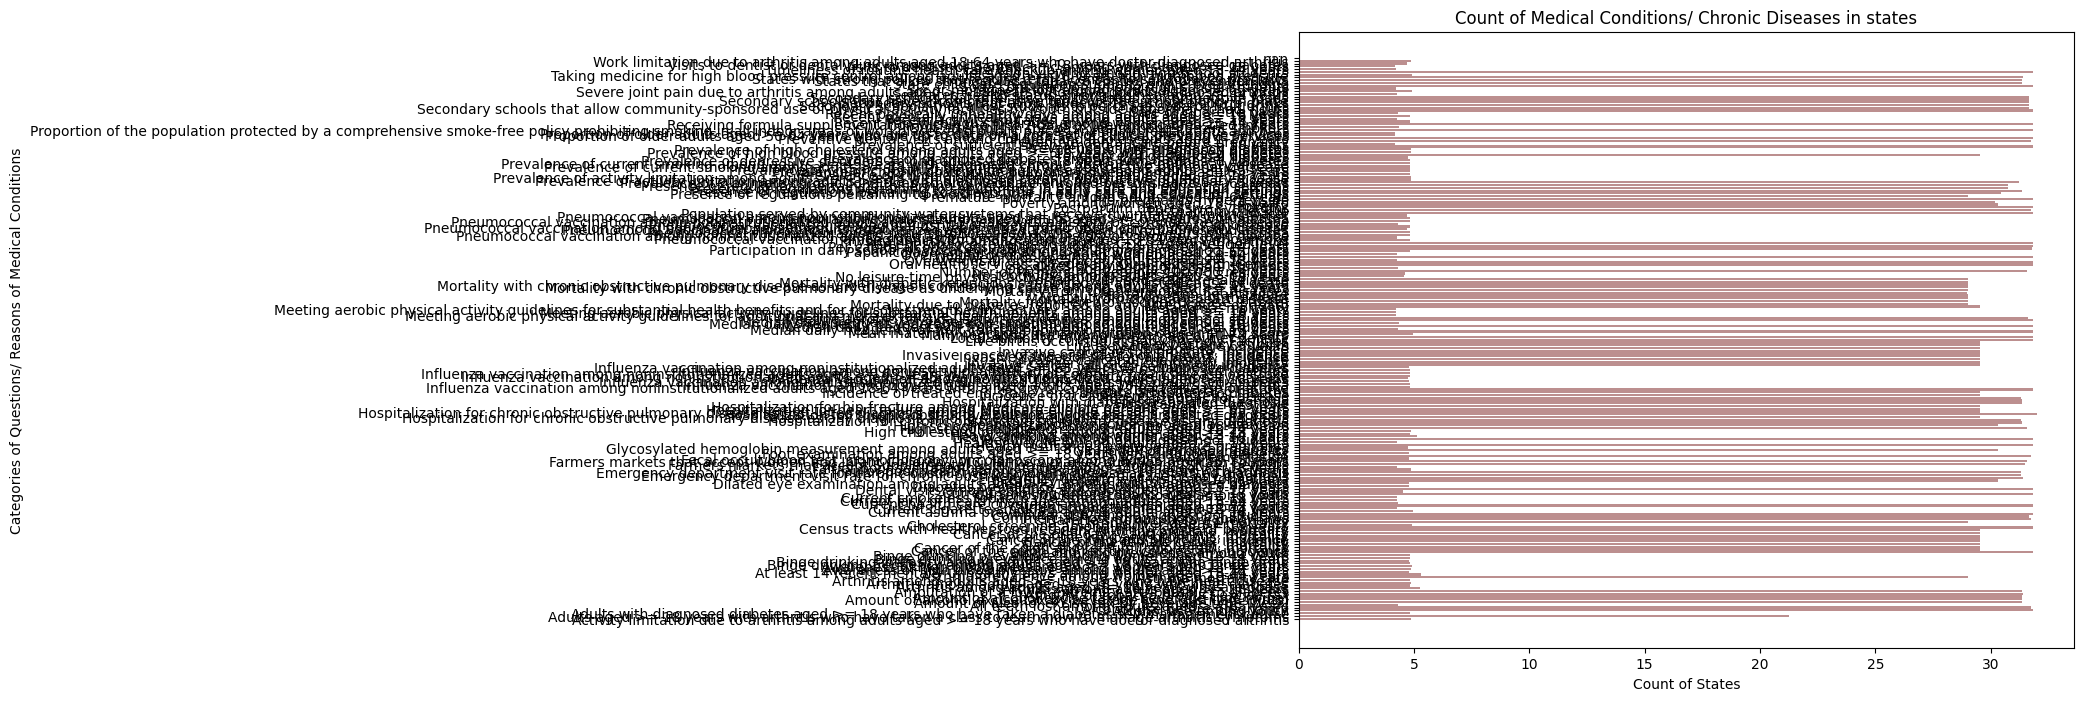

In [ ]:
fig = plt.figure(figsize = (10, 8))
plt.barh(unique_list, count_Ques, color ='rosybrown')

plt.xlabel("Count of States")
plt.ylabel("Categories of Questions/ Reasons of Medical Conditions")
plt.title("Count of Medical Conditions/ Chronic Diseases in states")
plt.show()

### What are the rates of chronic diseases with selected locations?

In [ ]:
topic_list =list(df2["Topic"].unique())
topic_list.sort()
print(topic_list)

['Alcohol', 'Arthritis', 'Asthma', 'Cancer', 'Cardiovascul', 'Cardiovascular Disease', 'Chronic Kidney Disease', 'Chronic Obstructive Pulmonary Disease', 'Diabetes', 'Disability', 'Immunization', 'Mental Health', 'Nutrition, Physical Activity, and Weight Status', 'Older Adults', 'Oral Health', 'Overarching Conditions', 'Reproductive Health', 'Tobacco']


In [ ]:
count_topic= df2.groupby("Topic")["LocationID"].mean()
count_topic_max = count_topic.sort_values(ascending=False)
count_topic_max

Topic
Disability                                         30.339623
Reproductive Health                                29.983712
Cancer                                             29.227113
Older Adults                                       28.630489
Chronic Obstructive Pulmonary Disease              27.823231
Cardiovascular Disease                             27.685746
Chronic Kidney Disease                             27.343903
Asthma                                             25.704786
Nutrition, Physical Activity, and Weight Status    24.651733
Alcohol                                            24.629594
Overarching Conditions                             24.423690
Oral Health                                        24.214880
Diabetes                                           23.758073
Tobacco                                            20.465396
Arthritis                                           7.161385
Mental Health                                       5.705667
Immunization      

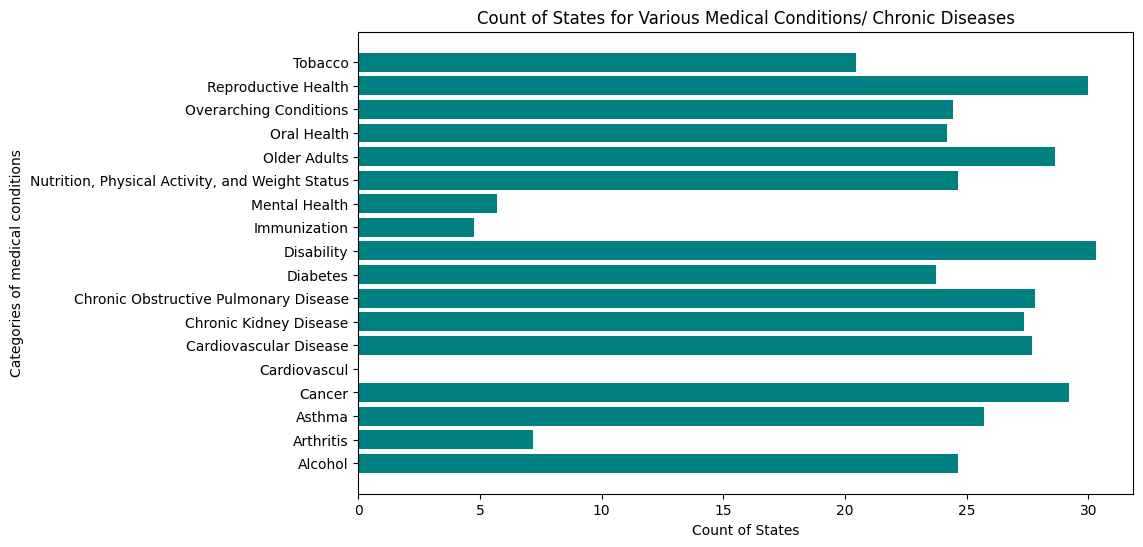

In [ ]:
fig = plt.figure(figsize = (10, 6))
plt.barh(topic_list, count_topic, color ='teal')
plt.xlabel("Count of States")
plt.ylabel("Categories of medical conditions")
plt.title("Count of States for Various Medical Conditions/ Chronic Diseases")
plt.show()

# <font color='red'>IV. Data Preprocessing (Part 2)

This is the start of further processing the dataset into only integer values for clustering. This section as includes selecting only the cancer data from the larger dataset.

## Next Steps Before:
- Populate GeoLocation column with coordinates of states.
- Not sure how to populate/ remove missing data from States/ Countries columns
- Get values only 2008 and above
- ensure everything is string/ int/ float

#### Model Creation: Spectral Clustering Algorithm

### Only considering Cancer data

drop all the rows in topic which is not equivalent to Cancer. since we are more interested in Cancer dataset for the first case



In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606932 entries, 0 to 606931
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  606932 non-null  int64  
 1   YearEnd                    606932 non-null  int64  
 2   LocationAbbr               606932 non-null  object 
 3   LocationDesc               606932 non-null  object 
 4   DataSource                 606932 non-null  object 
 5   Topic                      606932 non-null  object 
 6   Question                   606932 non-null  object 
 7   DataValueUnit              454808 non-null  object 
 8   DataValueType              606932 non-null  object 
 9   DataValue                  427036 non-null  object 
 10  StratificationCategory1    606932 non-null  object 
 11  Stratification1            606931 non-null  object 
 12  GeoLocation                601102 non-null  object 
 13  LocationID                 60

In [ ]:
#delete the rows where topic != Cancer
#this deletion can be done by selecting the rows where topic != "Cancer"

In [ ]:
df_cancer = df.copy(deep=True)
df_cancer = df_cancer.drop(df_cancer[df_cancer["Topic"] != "Cancer"].index, inplace=False)
df_cancer = df_cancer.drop(
    columns=['Response', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3', 'Stratification3',
             'ResponseID', 'StratificationCategoryID2', 'StratificationID2', 'StratificationCategoryID3',
             'StratificationID3', 'DataValueFootnoteSymbol', 'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit', 'GeoLocation',
             'DataValueTypeID', 'StratificationID1', 'StratificationCategoryID1', 'QuestionID', 'LocationDesc',
             'TopicID', 'DataValue', 'LocationAbbr'])
df_cancer.fillna("No Data", inplace=True)

def dv_helper(x):
    if x == "No Data":
        return 0
    else:
        return x
df_cancer['DataValueAlt'] = df_cancer['DataValueAlt'].apply(dv_helper).astype(np.float32)
print(df_cancer.shape)

(49465, 11)


In [ ]:
df_cancer.shape

(161783, 21)

so at this point, we only have rows with only Cancer disease.

In [ ]:
df_cancer.head()

,YearStart,YearEnd,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValueAlt,StratificationCategory1,Stratification1,LocationID
29,2008,2012,Death Certificate,Cancer,"Cancer of the oral cavity and pharynx, mortality",No Data,Average Annual Number,329.0,Gender,Male,36
30,2009,2013,Death Certificate,Cancer,"Cancer of the oral cavity and pharynx, mortality",No Data,Average Annual Number,336.0,Gender,Male,36
31,2011,2015,Death Certificate,Cancer,"Cancer of the oral cavity and pharynx, mortality",No Data,Average Annual Number,344.0,Gender,Male,36
32,2012,2016,Death Certificate,Cancer,"Cancer of the oral cavity and pharynx, mortality",No Data,Average Annual Number,354.0,Gender,Male,36
33,2012,2016,Death Certificate,Cancer,"Cancer of the prostate, mortality",No Data,Average Annual Number,454.0,Overall,Overall,8


In [ ]:
df_cancer.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'DataValueUnit', 'DataValueType', 'DataValue',
       'StratificationCategory1', 'Stratification1', 'GeoLocation',
       'LocationID', 'TopicID', 'QuestionID', 'DataValueTypeID',
       'StratificationCategoryID1', 'StratificationID1', 'States 2',
       'Counties 2'],
      dtype='object')

In [ ]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161783 entries, 29 to 606900
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  161783 non-null  int64  
 1   YearEnd                    161783 non-null  int64  
 2   LocationAbbr               161783 non-null  object 
 3   LocationDesc               161783 non-null  object 
 4   DataSource                 161783 non-null  object 
 5   Topic                      161783 non-null  object 
 6   Question                   161783 non-null  object 
 7   DataValueUnit              108535 non-null  object 
 8   DataValueType              161783 non-null  object 
 9   DataValue                  122685 non-null  object 
 10  StratificationCategory1    161783 non-null  object 
 11  Stratification1            161783 non-null  object 
 12  GeoLocation                158711 non-null  object 
 13  LocationID                 1

categorize the Stratification1 column to convert it to numeric column

In [ ]:
#defining function for categorizing "Stratification Category1" column
def filter_strat(x):
  if x == 'Overall':
    y = 0
    return y
  if x == 'Gender':
    y = 1
    return y
  if x == 'Race/Ethnicity':
    y = 2
    return y

#applying the filter function to 'Salary' column
df_cancer['category_strat'] = df_cancer['StratificationCategory1'].apply(filter_strat)

In [ ]:
#defining function for categorizing "Stratification1" column
def filter_strat1(x):
  if x == 'Overall':
    y = 0
    return y
  elif x == 'Male':
    y = 1
    return y
  elif x == 'Female':
    y = 2
    return y
  else:
    y = -1
    return y

#applying the filter function to 'Salary' column
df_cancer['category_strat1'] = df_cancer['Stratification1'].apply(filter_strat1)

In [ ]:
#defining function for categorizing "Question" column
def filter_mortality(x):
  if x[:-9] == 'mortality':
    return 1
  else:
    return 0


#applying the filter function to 'Question' column
df_cancer['Mortality'] = df_cancer['Question'].apply(filter_mortality)

In [ ]:
# - encode Question, DataValueType, DataValueUnit
# encoding follows a positive integer count starting from 1.
# 'No Data' elements will be 0 to minimize impact on data.
def get_mapping(column):
  u = list(column.unique())
  mapping = {}
  idx = 1
  for i in u:
    if i == 'No Data':
      mapping[i] = 0
    mapping[i] = idx
    idx+=1
  return mapping

q_map = get_mapping(df_cancer['Question'])
dv_map = get_mapping(df_cancer['DataValueType'])
du_map = get_mapping(df_cancer['DataValueUnit'])


df_cancer['category_question'] = df_cancer['Question'].apply(lambda x: q_map[x])
df_cancer['category_datavaluetype'] = df_cancer['DataValueType'].apply(lambda x: dv_map[x])
df_cancer['category_datavalueunit'] = df_cancer['DataValueUnit'].apply(lambda x: du_map[x])


# - use Question, DataValueType, DataValueUnit, LocationID, Stratification1, and any other derived columns like Mortality to plug into algorithms as multidimensional points.
print(df_cancer.head())

    YearStart  YearEnd         DataSource   Topic  \
29       2008     2012  Death Certificate  Cancer   
30       2009     2013  Death Certificate  Cancer   
31       2011     2015  Death Certificate  Cancer   
32       2012     2016  Death Certificate  Cancer   
33       2012     2016  Death Certificate  Cancer   

                                            Question DataValueUnit  \
29  Cancer of the oral cavity and pharynx, mortality       No Data   
30  Cancer of the oral cavity and pharynx, mortality       No Data   
31  Cancer of the oral cavity and pharynx, mortality       No Data   
32  Cancer of the oral cavity and pharynx, mortality       No Data   
33                 Cancer of the prostate, mortality       No Data   

            DataValueType  DataValueAlt StratificationCategory1  \
29  Average Annual Number         329.0                  Gender   
30  Average Annual Number         336.0                  Gender   
31  Average Annual Number         344.0                  Ge

In [ ]:
#considering the columns with integer data types only --> this will help in prediction as mentioned in the next cell
df_cancer_encode = df_cancer.loc[:, ['LocationID', 'category_datavaluetype', 'category_question', 'category_strat', 'category_strat1', 'DataValueAlt']]

In [ ]:
df_cancer.head()

,YearStart,YearEnd,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValueAlt,StratificationCategory1,Stratification1,LocationID,category_strat,category_strat1,Mortality,category_question,category_datavaluetype,category_datavalueunit
29,2008,2012,Death Certificate,Cancer,"Cancer of the oral cavity and pharynx, mortality",No Data,Average Annual Number,329.0,Gender,Male,36,1,1,0,1,1,1
30,2009,2013,Death Certificate,Cancer,"Cancer of the oral cavity and pharynx, mortality",No Data,Average Annual Number,336.0,Gender,Male,36,1,1,0,1,1,1
31,2011,2015,Death Certificate,Cancer,"Cancer of the oral cavity and pharynx, mortality",No Data,Average Annual Number,344.0,Gender,Male,36,1,1,0,1,1,1
32,2012,2016,Death Certificate,Cancer,"Cancer of the oral cavity and pharynx, mortality",No Data,Average Annual Number,354.0,Gender,Male,36,1,1,0,1,1,1
33,2012,2016,Death Certificate,Cancer,"Cancer of the prostate, mortality",No Data,Average Annual Number,454.0,Overall,Overall,8,0,0,0,2,1,1


LocationAbbr
DataValueUnit
DataValueType
StratificationCategory1
Stratification1
Mortality


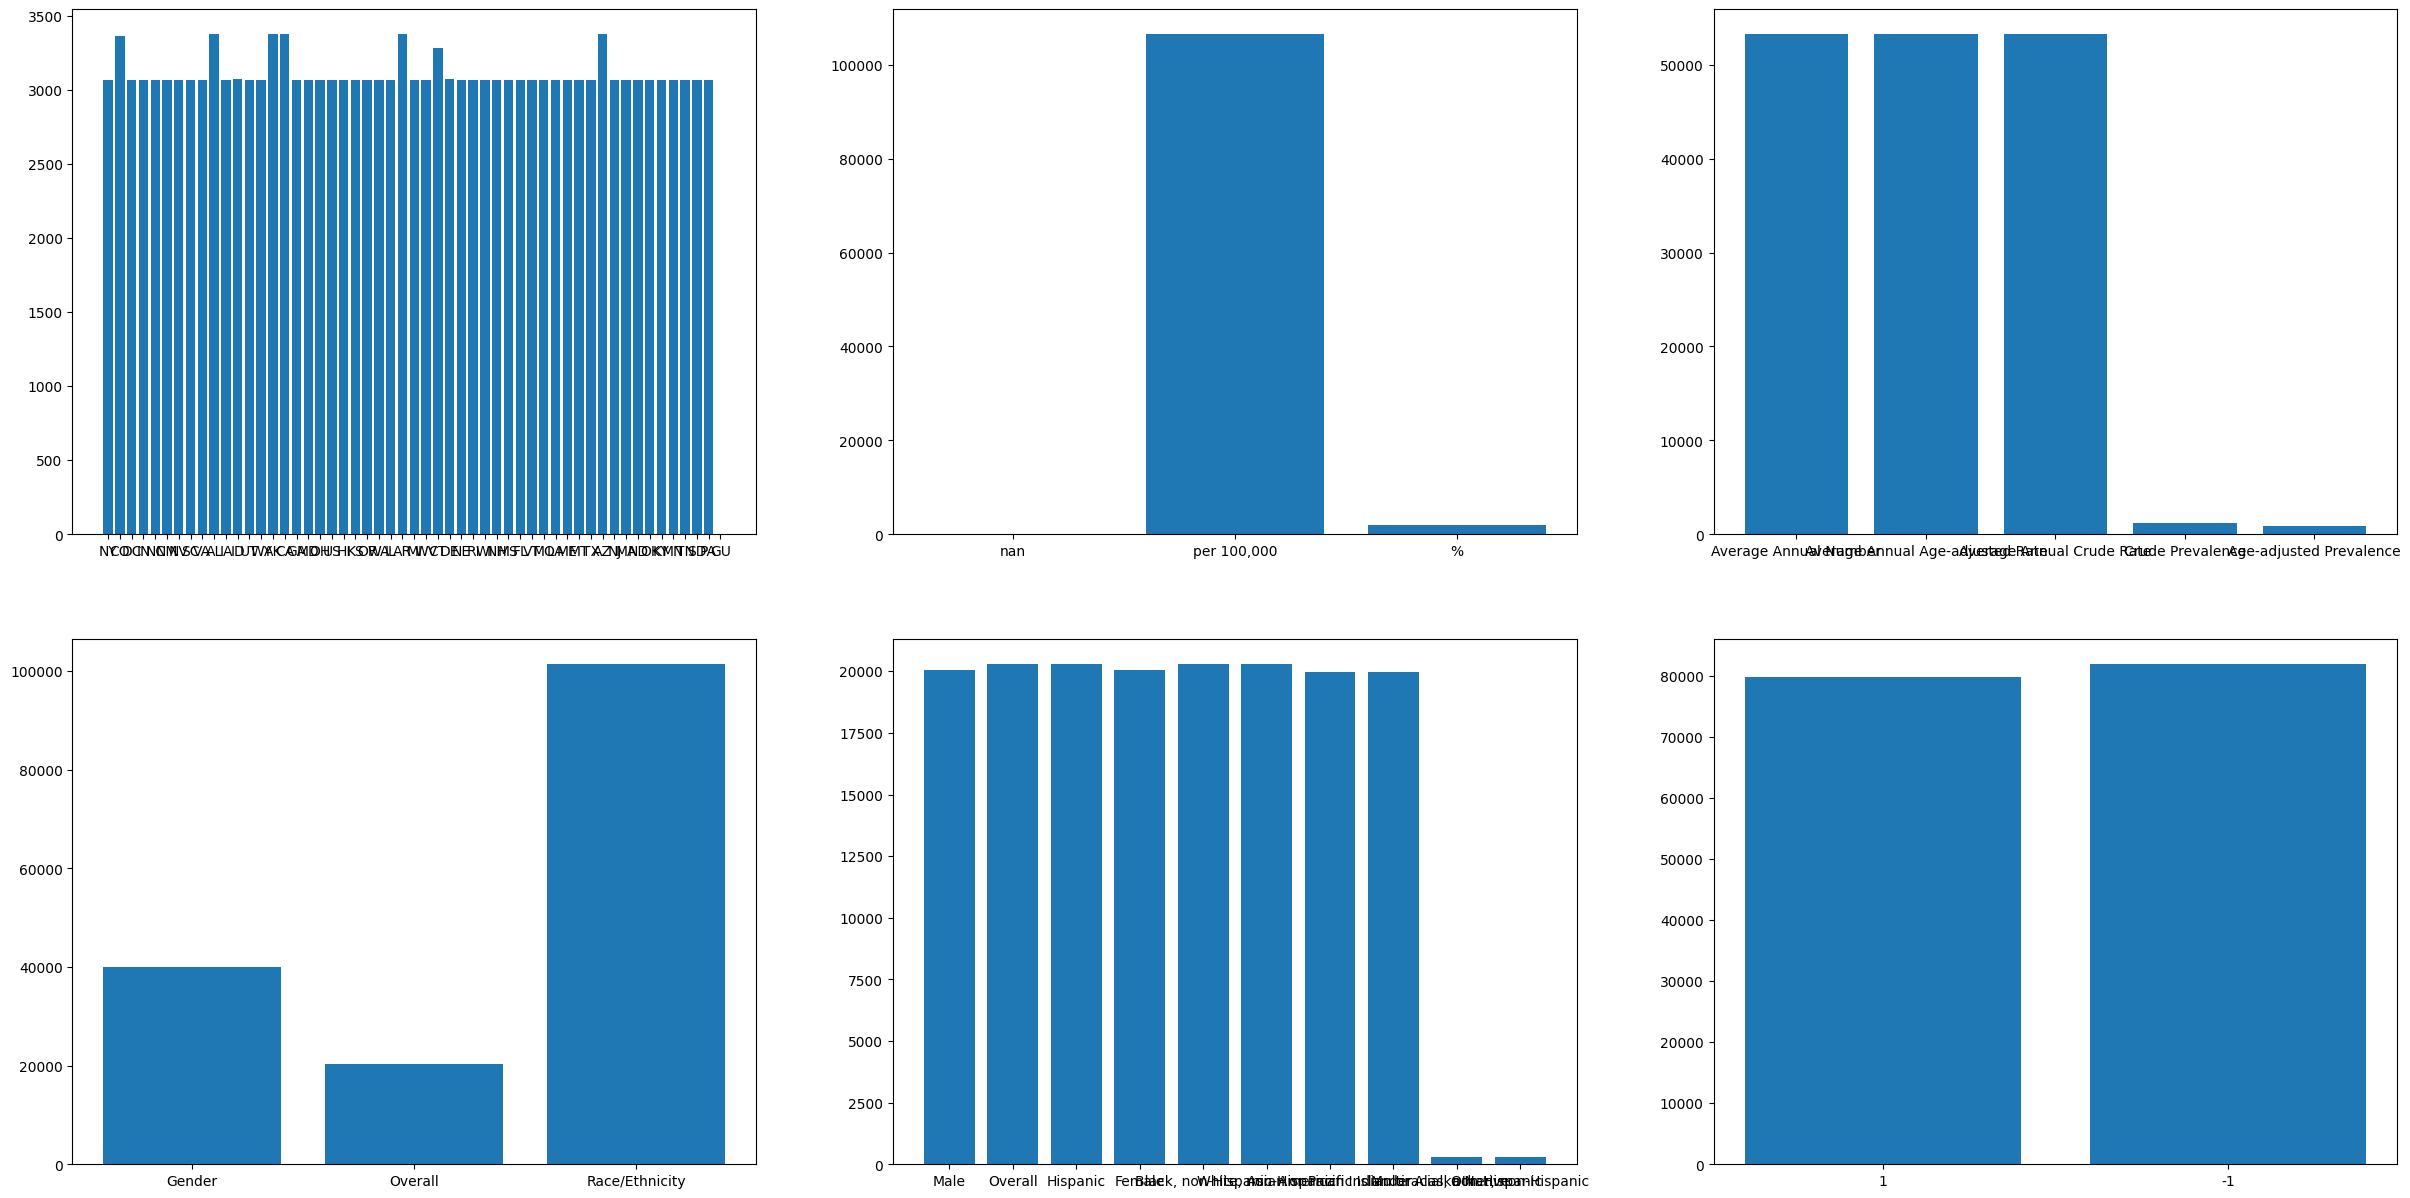

In [ ]:
explore =  pd.DataFrame()
xk = ['LocationAbbr', 'DataValueUnit', 'DataValueType', 'StratificationCategory1', 'Stratification1', 'Mortality']
l_x = int(len(xk)/2)
fig, axs = plt.subplots(int(l_x/2)+1, l_x)
m = 0
n = 0
for k in xk:
  print(k)
  a = []
  b = []
  for i in df_cancer[k].unique():
    a.append(str(i))
    b.append(len(df_cancer[df_cancer[k] == i].index))
    # temp.append((i, len(df_cancer[df_cancer[k] == i].index)))
    # print(i, len(df_cancer[df_cancer[k] == i].index))
  axs[m][n].bar(a, b, label = k)
  if n <= l_x/2:
    n+=1
  else:
    n = 0
    m+=1

# for i in range(l_x):
#   h_list = explore[keys[i]]
#   print(h_list[0][0])
#   # axs[i].bar(h_list[0], h_list[1])
# print(explore.keys())
# plt.figure(figsize=(400,40))
fig.set_size_inches(30, 15)
fig.show()
# plt.show()

In [ ]:
#considering the columns with integer data types only --> this will help in prediction as mentioned in the next cell
df_cancer_int = df_cancer[['LocationID', 'category_strat', 'category_strat1', 'Mortality']]

In [ ]:
df_derived = df_cancer.loc[:, ['category_strat', 'category_strat1', 'Mortality']]

# <font color='red'>V. Spectral Clustering Algorithm

This is the start of the model implentation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
# Preprocessing the data to make it visualizable

# Scaling the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cancer_int)

X_scaled_df = pd.DataFrame(X_scaled, columns = ['LocationID', 'category_strat', 'category_strat1', 'Mortality'])



In [ ]:
# Normalizing the Data
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

# Reducing the dimensions of the data
# if not looking for 3D data, make sure to remove 'P3' from X_principal.columns
pca = PCA(n_components = 3) #for 2D, components = 2
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
#X_principal.columns = ['P1', 'P2']
X_principal.columns = ['P1', 'P2', 'P3']

X_principal.head()

,P1,P2,P3
0,0.879677,0.578442,0.200312
1,0.879677,0.578442,0.200312
2,0.879677,0.578442,0.200312
3,0.879677,0.578442,0.200312
4,0.722034,0.333809,-0.511752


##### Now, next step for model creation of spectral clustering algorithm, We will use Two Affinity matrix here:
1. Gausian Kernal
2. Euclidean Distance

Affinity matrix with Gaussian Kernal

In [ ]:
#import required librray from - using scikit learn Spectral Clustering method
from sklearn.cluster import SpectralClustering
from sklearn.model_selection import train_test_split

In [ ]:
# Building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters = 4, affinity ='rbf')

In [ ]:
# Training the model and Storing the predicted cluster labels
#labels_rbf = spectral_model_rbf.fit_predict(X_principal)

# labels_rbf = spectral_model_rbf.fit(X_principal)

In [ ]:
sample_size = 5000
# sample_size = len(X_principal['P1'])

In [ ]:
def prep_graph(X):
  res = []
  for i in X.columns:
    # print(i)
    res.append([X.loc[:sample_size, i]])
  return res


In [ ]:
model = SpectralClustering(n_clusters = 4, affinity ='rbf')

# <font color='red'>VI. Spectral Clustering Visualization

This is the start of visualizing the results

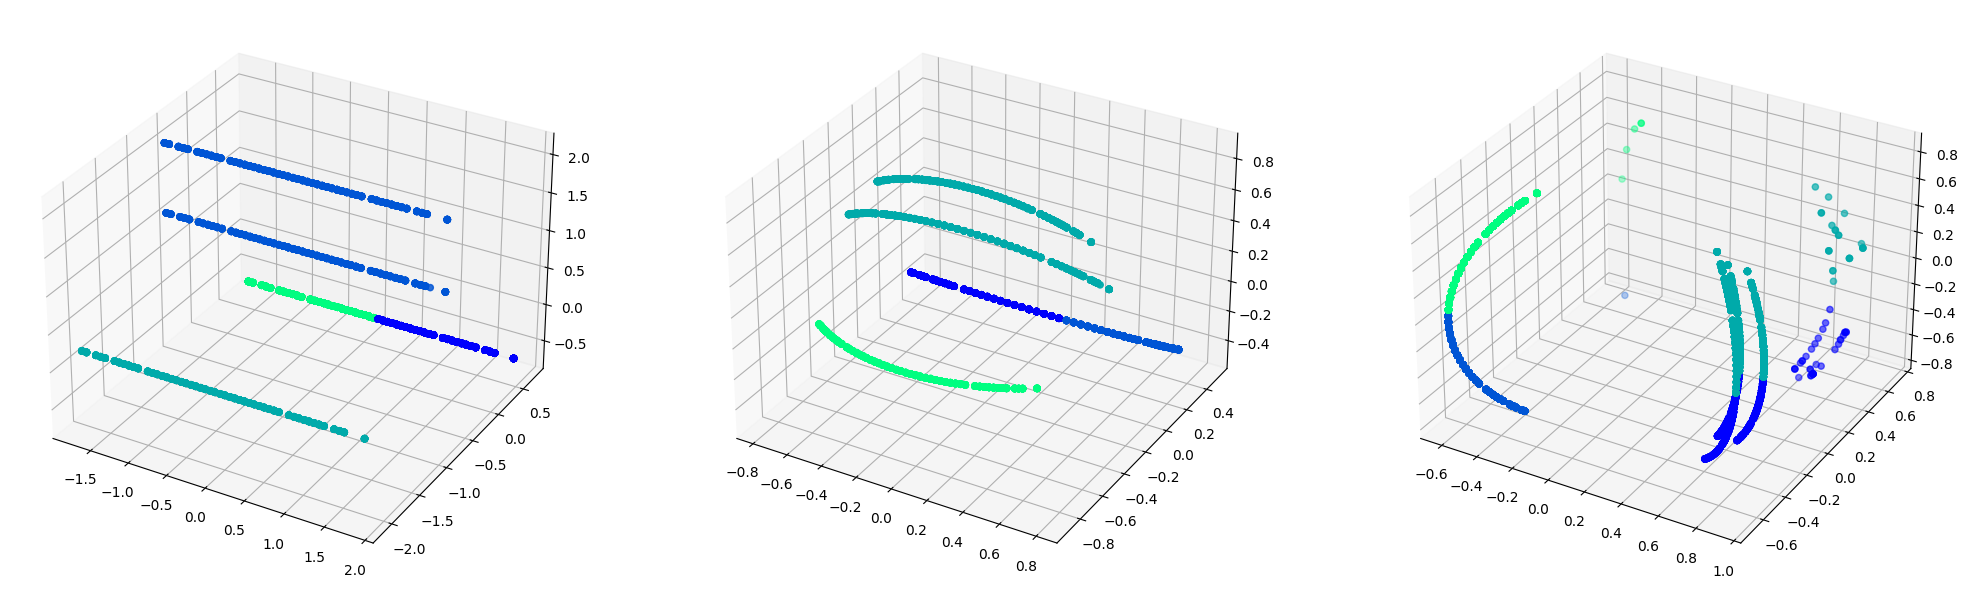

In [ ]:
### Visualizing the clustering
# X_scaled_df, X_normalized, X_principal
Xs = [X_scaled_df, X_normalized, X_principal]
l_x = len(Xs)
# X_graph = prep_graph(X)
graph_model = model
# when looking at 2d data, remove the subplot_kw argument
fig, axs = plt.subplots(1, l_x, subplot_kw={'projection': '3d'})
for i in range(l_x):
  X_graph = prep_graph(Xs[i])
  axs[i].scatter(X_graph[0], X_graph[1], X_graph[2],
           c = graph_model.fit_predict(Xs[i].loc[:sample_size]) , cmap =plt.cm.winter)
fig.set_size_inches(25, 15)
fig.show()

In [ ]:
#For number of clusters = 2 and discrete label assignments
model2 = SpectralClustering(n_clusters=2, assign_labels='discretize', random_state=0)

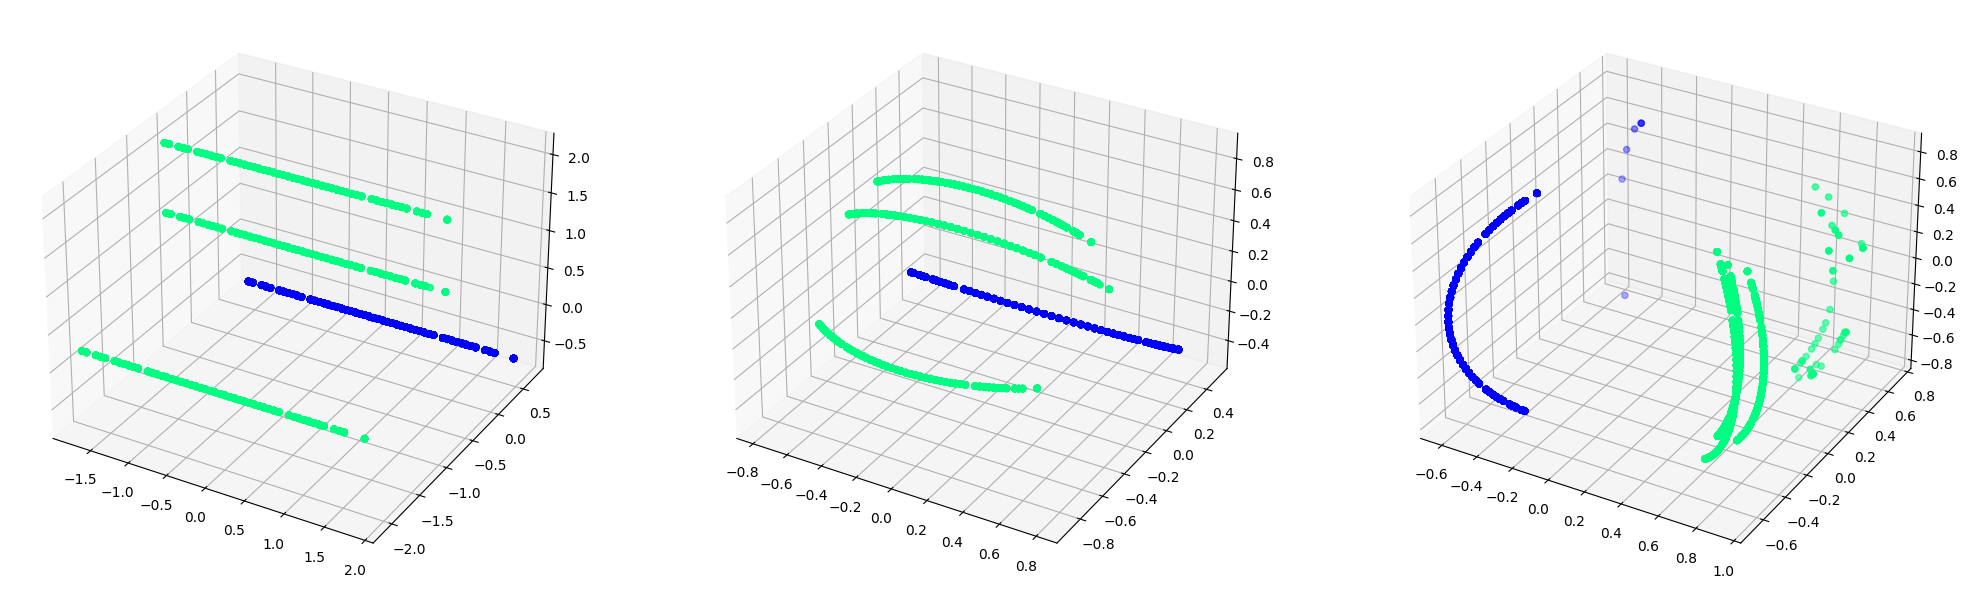

In [ ]:
### Visualizing the clustering
# X_scaled_df, X_normalized, X_principal
Xs = [X_scaled_df, X_normalized, X_principal]
l_x = len(Xs)
# X_graph = prep_graph(X)
graph_model = model2
# when looking at 2d data, remove the subplot_kw argument
fig, axs = plt.subplots(1, l_x, subplot_kw={'projection': '3d'})
for i in range(l_x):
  X_graph = prep_graph(Xs[i])
  axs[i].scatter(X_graph[0], X_graph[1], X_graph[2],
           c = graph_model.fit_predict(Xs[i].loc[:sample_size]) , cmap =plt.cm.winter)
fig.set_size_inches(25, 15)

fig.show()

These plots are showing 4 clusters of community for Cancer disease based on 4 features - location ID, stratification category, stratification ID and Mortality.
First plot in Cell 75, it showing the clustering graph with 4 clusters and affinity is gaussian kernal. It shows 4 different colors each corresponding to one cluster.

Second plot in Cell 77, is showing the clustering graph with 2 clusters and discrete label assignments with random seed = 0.

Both the graphs are showing in 3D each dimension is corresponding to 1 PCA. as we have total 3 PCAs - P1, P2 and P3, each axis represents the PCA values.


####Affinity matrix with Eucledean Distance

affinity = ‘nearest_neighbors’

In [ ]:
# Building the clustering model using nearest neighbors
model_nn = SpectralClustering(n_clusters = 4, affinity ='nearest_neighbors')



/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


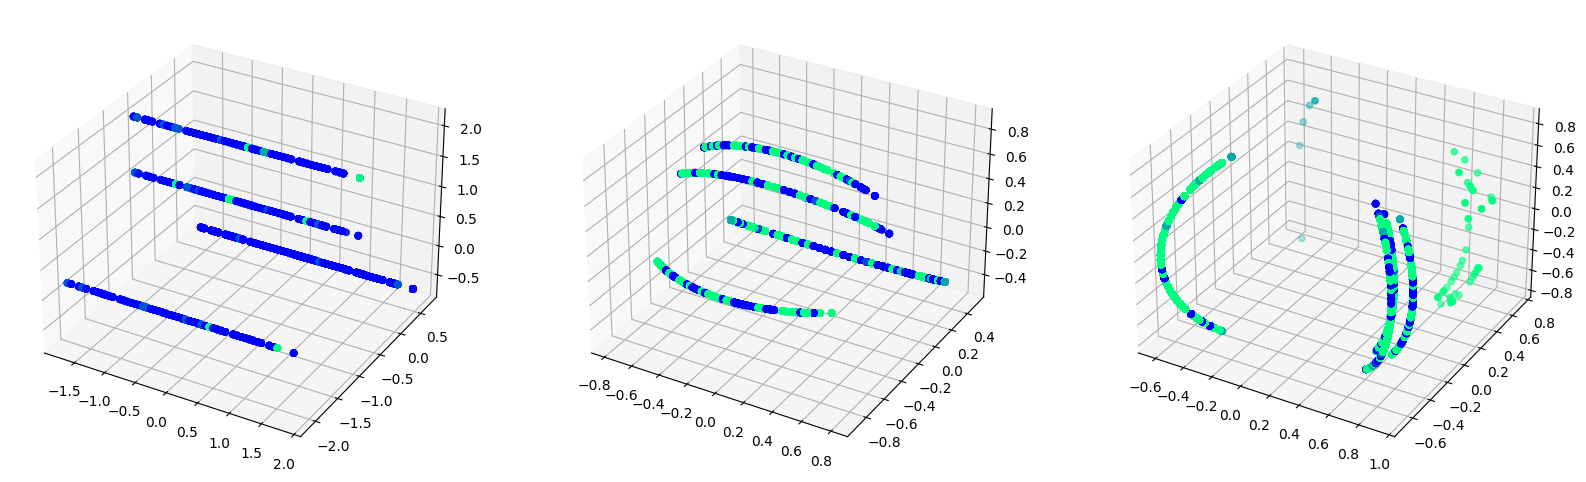

In [ ]:
### Visualizing the clustering
# X_scaled_df, X_normalized, X_principal
Xs = [X_scaled_df, X_normalized, X_principal]
l_x = len(Xs)
# X_graph = prep_graph(X)
graph_model = model_nn
# when looking at 2d data, remove the subplot_kw argument
fig, axs = plt.subplots(1, l_x, subplot_kw={'projection': '3d'})
for i in range(l_x):
  X_graph = prep_graph(Xs[i])
  axs[i].scatter(X_graph[0], X_graph[1], X_graph[2],
           c = graph_model.fit_predict(Xs[i].loc[:sample_size]) , cmap =plt.cm.winter)
fig.set_size_inches(20, 10)
fig.show()

In [ ]:
model2_nn = SpectralClustering(n_clusters=2, assign_labels='discretize', random_state=0, affinity ='nearest_neighbors')


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


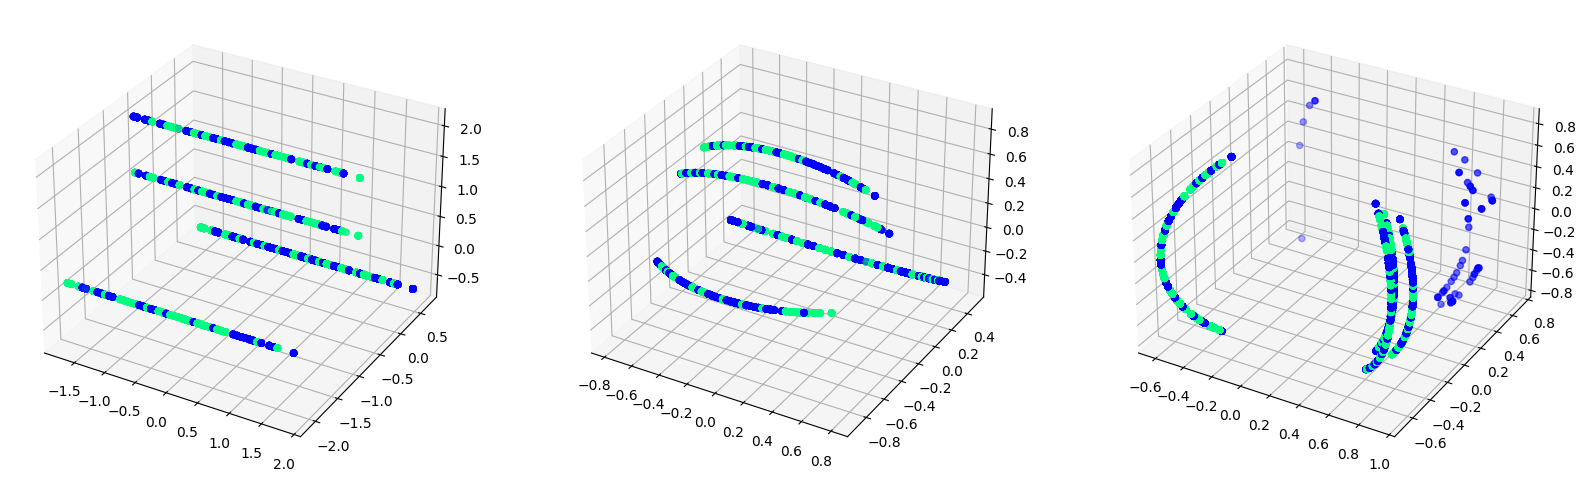

In [ ]:
### Visualizing the clustering
# X_scaled_df, X_normalized, X_principal
Xs = [X_scaled_df, X_normalized, X_principal]
l_x = len(Xs)
# X_graph = prep_graph(X)
graph_model = model2_nn
# when looking at 2d data, remove the subplot_kw argument
fig, axs = plt.subplots(1, l_x, subplot_kw={'projection': '3d'})
for i in range(l_x):
  X_graph = prep_graph(Xs[i])
  axs[i].scatter(X_graph[0], X_graph[1], X_graph[2],
           c = graph_model.fit_predict(Xs[i].loc[:sample_size]) , cmap =plt.cm.winter)
fig.set_size_inches(20, 10)
fig.show()

These plots are showing 4 clusters of community for Cancer disease based on 4 features - location ID, stratification category, stratification ID and Mortality. First plot in Cell 79, it showing the clustering graph with 4 clusters and affinity is nearest neighbors. It shows 4 different colors each corresponding to one cluster.

Second plot in Cell 81, is showing the clustering graph with 2 clusters and discrete label assignments with random seed = 0 and affinity is nearest neighbor.

Both the graphs are showing in 3D each dimension is corresponding to 1 PCA. as we have total 3 PCAs - P1, P2 and P3, each axis represents the PCA values.

# <font color='red'>VII. Spectral Clustering Analysis

This is the start of analyzing specific questions using the results

In [ ]:
labels = model.fit_predict(X_principal.loc[:sample_size])

# show some labels
# samp = labels.sample()
start = 0
r = 100
sample_data = []
for i in range(start,start+r):
  sample_data.append((labels[i], df_cancer_int.iloc[i, :]))
# print(sample_data[0])
# build location mapping
locs = df_cancer.loc[:, ("LocationAbbr", "LocationID")]
location_map = pd.Series(locs["LocationAbbr"],index=locs["LocationID"]).to_dict()
category_strat_map = {0:"Overall", 1: "Gender", 2:"Race/Ethnicity"}
category_strat1_map = {0:"Overall", 1: "Male", 2:"Female", -1:"Other"}
Mortality_map = {1: "Mortality", -1: "Incidence"}
for i in sample_data[:20]:
  print("LABEL: ", i[0], end=" | ")
  temp = i[1]
  print(temp["LocationID"], location_map[temp["LocationID"]], end=" ")
  print(category_strat_map[temp["category_strat"]], end=" ")
  print(category_strat1_map[temp["category_strat1"]], end=" ")
  print(Mortality_map[temp["Mortality"]])


LABEL:  2 | 36.0 IN Gender Male Mortality
LABEL:  2 | 36.0 IN Gender Male Mortality
LABEL:  2 | 36.0 IN Gender Male Mortality
LABEL:  2 | 36.0 IN Gender Male Mortality
LABEL:  1 | 8.0 nan Overall Overall Mortality
LABEL:  1 | 8.0 nan Gender Male Mortality
LABEL:  1 | 11.0 nan Overall Overall Mortality
LABEL:  1 | 18.0 nan Gender Male Mortality
LABEL:  2 | 37.0 NC Gender Male Mortality
LABEL:  2 | 35.0 DC Overall Overall Mortality
LABEL:  2 | 35.0 DC Overall Overall Mortality
LABEL:  0 | 32.0 NY Race/Ethnicity Other Mortality
LABEL:  2 | 45.0 ID Gender Male Mortality
LABEL:  2 | 51.0 GA Gender Male Mortality
LABEL:  1 | 1.0 nan Gender Female Mortality
LABEL:  1 | 19.0 nan Gender Female Mortality
LABEL:  1 | 16.0 nan Gender Male Mortality
LABEL:  1 | 16.0 nan Gender Male Mortality
LABEL:  2 | 49.0 AK Gender Female Mortality
LABEL:  2 | 56.0 US Gender Male Mortality


In [ ]:
# Do southern states have a higher level of cancer?
south_states = ['TX', 'OK', 'AL', 'MS', 'LA', 'KY', 'TN', 'AR', 'GA', 'FL', 'SC', 'NC', 'VA', 'WV']
south_data = []
for i in range(0, len(labels)):
  if location_map[df_cancer_int.iloc[i,:]["LocationID"]] in south_states:
    south_data.append((labels[i], df_cancer_int.iloc[i, :]))

for i in south_data[:]:
  print("LABEL: ", i[0], end=" | ")
  temp = i[1]
  print(temp["LocationID"], location_map[temp["LocationID"]], end=" ")
  print(category_strat_map[temp["category_strat"]], end=" ")
  print(category_strat1_map[temp["category_strat1"]], end=" ")
  print(Mortality_map[temp["Mortality"]])

LABEL:  2 | 37.0 NC Gender Male Mortality
LABEL:  2 | 51.0 GA Gender Male Mortality
LABEL:  2 | 59.0 VA Gender Female Mortality
LABEL:  2 | 51.0 GA Gender Female Mortality
LABEL:  2 | 51.0 GA Gender Female Mortality
LABEL:  2 | 41.0 SC Gender Female Mortality
LABEL:  2 | 41.0 SC Overall Overall Mortality
LABEL:  2 | 41.0 SC Gender Female Mortality
LABEL:  2 | 41.0 SC Overall Overall Mortality
LABEL:  2 | 41.0 SC Overall Overall Mortality
LABEL:  2 | 41.0 SC Gender Female Mortality
LABEL:  0 | 59.0 VA Race/Ethnicity Other Mortality
LABEL:  0 | 59.0 VA Race/Ethnicity Other Mortality
LABEL:  0 | 59.0 VA Race/Ethnicity Other Incidence
LABEL:  0 | 59.0 VA Race/Ethnicity Other Incidence
LABEL:  0 | 59.0 VA Race/Ethnicity Other Incidence
LABEL:  2 | 59.0 VA Gender Female Mortality
LABEL:  0 | 51.0 GA Race/Ethnicity Other Incidence
LABEL:  0 | 37.0 NC Race/Ethnicity Other Incidence
LABEL:  0 | 41.0 SC Race/Ethnicity Other Incidence
LABEL:  0 | 37.0 NC Race/Ethnicity Other Incidence
LABEL:  2 |

In [ ]:
# Can we see clustering on men's mortality across states?
mens_mort_data = []
for i in range(0, len(labels)):
  if category_strat1_map[df_cancer_int.iloc[i,:]["category_strat1"]] == 'Male':
    mens_mort_data.append((labels[i], df_cancer_int.iloc[i, :]))

for i in mens_mort_data[:]:
  print("LABEL: ", i[0], end=" | ")
  temp = i[1]
  print(temp["LocationID"], location_map[temp["LocationID"]], end=" ")
  print(category_strat1_map[temp["category_strat1"]], end=" ")
  print(Mortality_map[temp["Mortality"]])

LABEL:  2 | 36.0 IN Male Mortality
LABEL:  2 | 36.0 IN Male Mortality
LABEL:  2 | 36.0 IN Male Mortality
LABEL:  2 | 36.0 IN Male Mortality
LABEL:  1 | 8.0 nan Male Mortality
LABEL:  1 | 18.0 nan Male Mortality
LABEL:  2 | 37.0 NC Male Mortality
LABEL:  2 | 45.0 ID Male Mortality
LABEL:  2 | 51.0 GA Male Mortality
LABEL:  1 | 16.0 nan Male Mortality
LABEL:  1 | 16.0 nan Male Mortality
LABEL:  2 | 56.0 US Male Mortality
LABEL:  1 | 2.0 nan Male Mortality
LABEL:  1 | 18.0 nan Male Mortality
LABEL:  1 | 24.0 nan Male Incidence
LABEL:  1 | 6.0 nan Male Mortality
LABEL:  1 | 6.0 nan Male Mortality
LABEL:  2 | 44.0 IA Male Incidence
LABEL:  1 | 28.0 nan Male Incidence
LABEL:  1 | 20.0 nan Male Incidence
LABEL:  2 | 54.0 NV Male Incidence
LABEL:  2 | 51.0 GA Male Incidence
LABEL:  1 | 4.0 nan Male Incidence
LABEL:  2 | 48.0 WY Male Incidence
LABEL:  2 | 54.0 NV Male Incidence
LABEL:  2 | 34.0 CO Male Incidence
LABEL:  1 | 1.0 nan Male Incidence
LABEL:  1 | 1.0 nan Male Incidence
LABEL:  2 | 5

These plots are showing 4 clusters of community for Cancer disease based on 4 features - location ID, stratification category, stratification ID and Mortality. First plot in Cell 79, it showing the clustering graph with 4 clusters and affinity is nearest neighbors. It shows 4 different colors each corresponding to one cluster.

Second plot in Cell 81, is showing the clustering graph with 2 clusters and discrete label assignments with random seed = 0 and affinity is nearest neighbor.

Both the graphs are showing in 3D each dimension is corresponding to 1 PCA. as we have total 3 PCAs - P1, P2 and P3, each axis represents the PCA values.

# <font color='red'>VIII. Louvain’s Algorithm

This is the start of the implementation

In [ ]:
import random
import networkx as nx
import numpy as np
from community import community_louvain
import matplotlib.pyplot as plt


In [ ]:
df_cancer['LocationID'].dtypes

dtype('float64')

In [ ]:
entities = df_cancer['LocationID'].astype(int)  # Assuming 'df_cancer' is the DataFrame with 'LocationID' column

entities = df_cancer['LocationID'].astype(int)  # Assuming 'df_cancer' is the DataFrame with 'LocationID' column

edges = []
for entity in entities:
    question = df_cancer.loc[df_cancer['LocationID'] == entity, 'Question'].values[0]
    edges.append((entity, question))


In [ ]:
#Step 3: Build the affiliation graph
G = nx.Graph()
G.add_nodes_from(entities)
G.add_edges_from(edges)


Degree Centrality: {36: 0.016129032258064516, 8: 0.016129032258064516, 11: 0.016129032258064516, 18: 0.016129032258064516, 37: 0.016129032258064516, 35: 0.016129032258064516, 32: 0.016129032258064516, 45: 0.016129032258064516, 51: 0.016129032258064516, 1: 0.016129032258064516, 19: 0.016129032258064516, 16: 0.016129032258064516, 49: 0.016129032258064516, 56: 0.016129032258064516, 2: 0.016129032258064516, 6: 0.016129032258064516, 13: 0.016129032258064516, 24: 0.016129032258064516, 39: 0.016129032258064516, 59: 0.016129032258064516, 15: 0.016129032258064516, 20: 0.016129032258064516, 41: 0.016129032258064516, 53: 0.016129032258064516, 17: 0.016129032258064516, 5: 0.016129032258064516, 26: 0.016129032258064516, 54: 0.016129032258064516, 9: 0.016129032258064516, 10: 0.016129032258064516, 31: 0.016129032258064516, 44: 0.016129032258064516, 55: 0.016129032258064516, 33: 0.016129032258064516, 28: 0.016129032258064516, 12: 0.016129032258064516, 50: 0.016129032258064516, 29: 0.016129032258064516

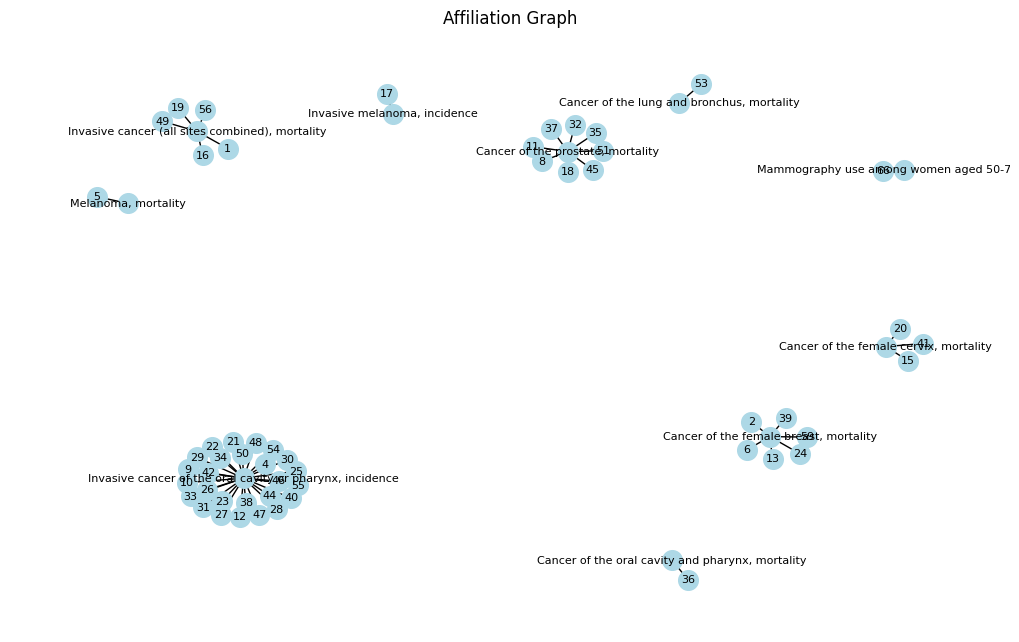

In [ ]:
# Example analysis: Calculate degree centrality
degree_centrality = nx.degree_centrality(G)
print("Degree Centrality:", degree_centrality)

# Step 5: Visualize the affiliation graph
plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_size=200, node_color='lightblue', font_size=8)
plt.title("Affiliation Graph")
plt.show()

In [ ]:
comms = community_louvain.best_partition(G)

for node, community_id in comms.items():
    print(f"Node: {node}, Community: {community_id}")

Node: 36, Community: 1
Node: 8, Community: 2
Node: 11, Community: 2
Node: 18, Community: 2
Node: 37, Community: 2
Node: 35, Community: 2
Node: 32, Community: 2
Node: 45, Community: 2
Node: 51, Community: 2
Node: 1, Community: 3
Node: 19, Community: 3
Node: 16, Community: 3
Node: 49, Community: 3
Node: 56, Community: 3
Node: 2, Community: 4
Node: 6, Community: 4
Node: 13, Community: 4
Node: 24, Community: 4
Node: 39, Community: 4
Node: 59, Community: 4
Node: 15, Community: 5
Node: 20, Community: 5
Node: 41, Community: 5
Node: 53, Community: 6
Node: 17, Community: 0
Node: 5, Community: 7
Node: 26, Community: 8
Node: 54, Community: 8
Node: 9, Community: 8
Node: 10, Community: 8
Node: 31, Community: 8
Node: 44, Community: 8
Node: 55, Community: 8
Node: 33, Community: 8
Node: 28, Community: 8
Node: 12, Community: 8
Node: 50, Community: 8
Node: 29, Community: 8
Node: 22, Community: 8
Node: 23, Community: 8
Node: 30, Community: 8
Node: 48, Community: 8
Node: 4, Community: 8
Node: 34, Communit

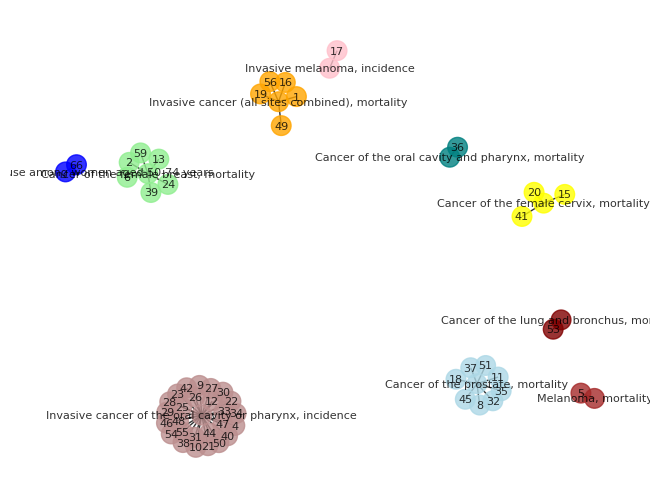

In [ ]:
unique_coms = np.unique(list(comms.values()))
cmap = {
    0 : 'maroon',
    1 : 'teal',
    2 : 'lightblue',
    3 : 'orange',
    4 : 'lightgreen',
    5 : 'yellow',
    6 : 'blue',
    7 : 'pink',
    8 : 'rosybrown',
    9 : 'brown'
}

node_cmap = [cmap[v] for _,v in comms.items()]

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size = 200, alpha = 0.8, node_color=node_cmap, font_size=8)
plt.show()

In [ ]:
df_location = df_cancer[['LocationAbbr', 'LocationID']]
df_location = df_location.drop_duplicates()
location_labels = df_location[['LocationAbbr']]
location_num = df_location[['LocationID']]
df_location

,LocationAbbr,LocationID
29,NY,36.0
33,CO,8.0
35,DC,11.0
36,IN,18.0
37,NC,37.0
38,NM,35.0
40,NV,32.0
41,SC,45.0
42,VA,51.0
43,AL,1.0


# <font color='red'>X. BigCLAM


In [ ]:
!pip install cdlib
!pip install leidenalg wurlitzer ASLPAw
!pip install infomap
!pip install karateclub
# PLEASE IGNORE THE ERROR OUTPUT FROM THIS STATEMENT

In [ ]:
#considering the columns with integer data types only --> this will help in prediction as mentioned in the next cell
df_cancer_encode = df_cancer.loc[:, ['LocationID', 'category_question', 'category_strat1', 'DataValueAlt']]
k = 0
for i in df_cancer_encode.duplicated():
  if i:
    k+=1
print(k)
# we have 66549 duplicates, will remove
df_cancer_encode.drop_duplicates(inplace=True, ignore_index=True)

# In order for us to use this library, we need the node datatype to be hashable
# this means we will interpret the row into a string
def row_to_str(row):
  res = ""
  for i in range(len(row)):
    res = res + str(int(row[i]))
  return res
df_cancer_encode['STRIDX'] = df_cancer_encode.apply(lambda x: row_to_str(x), axis=1)


In [ ]:

#################
# for each row in df_cancer_int, go through every other row and fill in the values
# ISSUE: distance should be contextually scaled based on importance of feature, can be done arbitrarily for now
def distance(x, y):
  ans = 0
  for i in range(len(x)):
    ans += abs(x[i] - y[i])
  return ans
# example to add edges to graph
# G.add_edge(2, 3, weight=0.9)
import networkx as nx


# add each edge of node->node with weight calculated in the same loop
foundset = set()
es = []
def build_adj(row, found, edges):
  def get_edges(row2, edges):
      w = distance(row[:-1], row2[:-1])
      if row2['STRIDX'] not in found:
        edges.append((row.name, row2.name, w))
  if not len(found)%100:
    print(len(found), "rows")
  r1 = row['STRIDX']
  found.add(r1)
  df_test.apply(get_edges, axis=1, edges=es)

def get_strs(row, d):
  if row not in d.keys():
    d[row] = row_to_str(row)

# this is an undirected graph where weights will go both ways
G = nx.Graph()
r_vals = {}


df_test = df_cancer_encode[:1000]
df_test.apply(build_adj, axis=1, found=foundset, edges=es)
G.add_weighted_edges_from(ebunch_to_add=es)



# once complete, we can run algorithms using cdlib directly with networkx graphs

In [ ]:
from cdlib import algorithms
coms = algorithms.big_clam(G, dimensions=6, iterations=10, learning_rate=0.010)
# lpa_coms = nx.community.asyn_lpa_communities(G)
gre_coms = nx.community.greedy_modularity_communities(G)


In [ ]:
clam = coms.to_node_community_map()
coms.newman_girvan_modularity()


### Histogram of node number (Y) over number of communities (X)

As we can see, the BigCLAM algorithm dumped all the points together into one giant community.

In [ ]:
comms = []
nodes = []
hist_n = []
tcoms = list(clam.keys())
for i in tcoms:
  nodes.append(i)
  hist_n.append(len(clam[i]))

fig = plt.figure(figsize = (10, 6))
plt.barh(nodes, width=hist_n, height=1)
plt.show()


### Comparison with Greedy Modularity Maximization

Greedy Modularity Maximization created two large communities that contain most of the nodes provided.

In [ ]:
comms = []
nodes = []
tcoms = list(gre_coms)
for i in range(0, len(tcoms)):
  for k in tcoms[i]:
    nodes.append(k)
    comms.append(i/255)
print(comms)
print(len(tcoms))



pos = nx.shell_layout(G, gre_coms)

nx.draw_networkx(G, pos, node_size=10, width=0.2, nodelist=nodes, edgelist=[], node_color=comms, with_labels=False)

# <font color='red'>XI. Girvan-Newman Algorithm

In [ ]:
import random
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
entities = df_cancer['LocationID'].astype(int)  # Assuming 'df_cancer' is the DataFrame with 'LocationID' column

entities = df_cancer['LocationID'].astype(int)  # Assuming 'df_cancer' is the DataFrame with 'LocationID' column

edges = []
for entity in entities:
    question = df_cancer.loc[df_cancer['LocationID'] == entity, 'Question'].values[0]
    edges.append((entity, question))

In [ ]:
#Step 3: Build the graph
G = nx.Graph()
G.add_nodes_from(entities)
G.add_edges_from(edges)


In [ ]:
#Step 4: find communities using Girvan-Newman
communities = list(nx.community.girvan_newman(G))

In [ ]:
# Modularity -> measures the strength of division of a network into modules
modularity_df = pd.DataFrame(
    [
        [k + 1, nx.community.modularity(G, communities[k])]
        for k in range(len(communities))
    ],
    columns=["k", "modularity"],
)

In [ ]:
modularity_df.head()

##### To specify a different ranking algorithm for edges, use the most_valuable_edge keyword argument:

In [ ]:
from networkx import edge_betweenness_centrality
from random import random

def most_central_edge(G):
  centrality = edge_betweenness_centrality(G)
  max_cent = max(centrality.values())
  # Scale the centrality values so they are between 0 and 1,
  # and add some random noise.
  centrality = {e: c / max_cent for e, c in centrality.items()}
  # Add some random noise.
  centrality = {e: c + random() for e, c in centrality.items()}
  return max(centrality, key=centrality.get)

#G = nx.path_graph(10)
comp = nx.community.girvan_newman(G, most_valuable_edge=most_central_edge)

In [ ]:
unique_coms = np.unique(list(comp))

In [ ]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size = 200, alpha = 0.8, node_color='orange', font_size=8)
plt.show()

# <font color='red'>DNN Location Prediction

This section uses a deep neural network to attempt to predict the state/territory of an individual. This may not be very accurate, since all of the data is anonymous. However, it is important to attempt, based on feedback.

In [ ]:
'''
Imports
'''
import tensorflow as tf
from sklearn.model_selection import train_test_split
import random

### Filter functions

In [ ]:
'''
Define some filters to transform string columns into numeric values
'''
# filter_topic() converts Topic into integer
topic_dict = {'Asthma':0, 'Cancer':1, 'Chronic Kidney Disease':2,
       'Chronic Obstructive Pulmonary Disease':3, 'Cardiovascular Disease':4,
       'Diabetes':5, 'Disability':6, 'Reproductive Health':7, 'Tobacco':8,
       'Alcohol':9, 'Arthritis':10}
def filter_topic(x):
  return topic_dict[x]
# filter_data_source() converts DataSource into integer
data_source_dict = {'SEDD; SID':0, 'NVSS':1, 'Death Certificate':2,
       'Statewide central cancer registries':3, 'CMS Part A Claims Data':4,
       'PRAMS':5, 'ACS 1-Year Estimates':6, 'STATE':7, 'YRBSS':8,
       'Legal Research':9, 'BRFSS':10, 'APIS':11, 'AEDS':12}
def filter_data_source(x):
  return data_source_dict[x]

# filter_data_value_type() converts DataValueTypeinto integer
data_value_type_dict = {'Number':0, 'Average Annual Number':1, 'Crude Prevalence':2,
       'Age-adjusted Rate':3,
       'Local control of the regulation of alcohol outlet density':4,
       'Crude Rate':5, 'Age-adjusted Prevalence':6, 'US Dollars':7,
       'Commercial host (dram shop) liability status for alcohol service':8,
       'Per capita alcohol consumption':9,
       'Average Annual Age-adjusted Rate':10, 'Average Annual Crude Rate':11}
def filter_data_value_type(x):
  return data_value_type_dict[x]
# filter_question() converts Question into integer
question_dict = {'Hospitalizations for asthma':0, 'Asthma mortality rate':1, 'Cancer of the oral cavity and pharynx, mortality':2, 'Cancer of the prostate, mortality':3,
       'Invasive cancer (all sites combined), mortality':4, 'Cancer of the female breast, mortality':5, 'Cancer of the female cervix, mortality':6,
       'Cancer of the colon and rectum (colorectal), mortality':7, 'Cancer of the lung and bronchus, mortality':8, 'Invasive melanoma, incidence':9,
       'Melanoma, mortality':10, 'Mortality with end-stage renal disease':11, 'Hospitalization for chronic obstructive pulmonary disease as first-listed diagnosis':12,
       'Hospitalization for chronic obstructive pulmonary disease as any diagnosis':13, 'Hospitalization for chronic obstructive pulmonary disease as first-listed diagnosis among Medicare-eligible persons aged >= 65 years':14,
       'Hospitalization for chronic obstructive pulmonary disease as any diagnosis among Medicare-eligible persons aged >= 65 years':15, 'Mortality from heart failure':16,
       'Hospitalization for heart failure among Medicare-eligible persons aged >= 65 years':17, 'Hospitalization for stroke':18, 'Pre-pregnancy hypertension':19,
       'Mortality due to diabetes reported as any listed cause of death':20, 'Mortality with diabetic ketoacidosis reported as any listed cause of death':21,
       'Amputation of a lower extremity attributable to diabetes':22, 'Hospitalization with diabetes as a listed diagnosis':23, 'Disability among adults aged >= 65 years':24,
       'Folic acid supplementation':25, 'Sale of cigarette packs':26, 'Chronic liver disease mortality':27, 'Alcohol use before pregnancy':8, 'Alcohol use among youth':29,
       'Local authority to regulate alcohol outlet density':30, 'Binge drinking prevalence among youth':31, 'Emergency department visit rate for asthma':32,
       'Adults aged >= 18 years with arthritis who have taken a class to learn how to manage arthritis symptoms':33, 'Amount of alcohol excise tax by beverage type (beer)':34,
       'Amount of alcohol excise tax by beverage type (wine)':35, 'Amount of alcohol excise tax by beverage type (distilled spirits)':36, 'Commercial host (dram shop) liability laws':37,
       'Per capita alcohol consumption among persons aged >= 14 years':38, 'Invasive cancer of the oral cavity or pharynx, incidence':39, 'Invasive cancer of the prostate, incidence':40,
       'Invasive cancer (all sites combined), incidence':41}
def filter_question(x):
  return question_dict[x]
# filter_data_value_unit() converts DataValueUnitinto integer
data_value_unit_dict = {'Number':1, '%':2, 'pack sales per capita':3, 'cases per 100,000':4,
       'cases per 10,000':5, '$':6, 'gallons':7, 'cases per 1,000,000':8,
       'per 100,000':9}
def filter_data_value_unit(x):
  if x not in data_value_unit_dict.keys():
      return 0
  return data_value_unit_dict[x]
# filter_strat_cat() converts StratificationCategory1 into integer
strat_cat_dict = {'Gender':0, 'Overall':1, 'Race/Ethnicity':2}
def filter_strat_cat(x):
  return strat_cat_dict[x]
# filter_stratification() converts Stratification1 into integer
stratification_dict = {'Male':0, 'Overall':1, 'Female':2, 'Hispanic':3, 'White, non-Hispanic':4,
       'Black, non-Hispanic':5, 'Asian or Pacific Islander':6,
       'American Indian or Alaska Native':7, 'Asian, non-Hispanic':8,
       'Multiracial, non-Hispanic':9, 'Other, non-Hispanic':10}
def filter_stratification(x):
  return stratification_dict[x]
# filter_topic_id() converts TopicID into integer
topic_id_dict = {'AST':0, 'CAN':1, 'CKD':2, 'COPD':3, 'CVD':4, 'DIA':5, 'DIS':6, 'RPH':7, 'TOB':8,
       'ALC':9, 'ART':10}
def filter_topic_id(x):
  if x not in topic_id_dict.keys():
    return 11
  return topic_id_dict[x]
# filter_question_id() converts QuestionID into integer
question_id_dict = {'AST3_1':0, 'AST4_1':1, 'CAN10_2':2, 'CAN11_2':3, 'CAN4_2':4, 'CAN5_2':5,
       'CAN6_2':6, 'CAN7_2':7, 'CAN8_2':8, 'CAN9_1':9, 'CAN9_2':10, 'CKD1_0':11,
       'COPD5_1':12, 'COPD5_2':13, 'COPD5_3':14, 'COPD5_4':15, 'CVD1_4':16, 'CVD2_0':17,
       'CVD3_1':18, 'CVD8_0':19, 'DIA1_1':20, 'DIA1_2':21, 'DIA4_0':22, 'DIA9_0':23,
       'DIS1_0':24, 'RPH3_0':25, 'TOB10_0':26, 'ALC6_0':27, 'ALC1_2':28, 'ALC1_1':29,
       'ALC10_0':30, 'ALC2_1':31, 'AST2_1':32, 'ART5_0':33, 'ALC8_0_1':34, 'ALC8_0_2':35,
       'ALC8_0_3':36, 'ALC9_0':37, 'ALC7_0':38, 'CAN10_1':39, 'CAN11_1':40, 'CAN4_1':41}
def filter_question_id(x):
  if x not in question_id_dict.keys():
    return 42
  return question_id_dict[x]
# filter_data_value_type_id() converts DataValueTypeID into integer
data_value_type_id_dict = {'NMBR':0, 'AVGANNNMBR':1, 'CRDPREV':2, 'AGEADJRATE':3, 'LCLCNTRLALC':4,
       'CRDRATE':5, 'AGEADJPREV':6, 'USD':7, 'COMMHSTLIAB':8, 'PERCAPALC':9,
       'AVGANNAGEADJRATE':10, 'AVGANNCRDRATE':11}
def filter_data_value_type_id(x):
  if x not in data_value_type_id_dict.keys():
    return 12
  return data_value_type_id_dict[x]
# filter_strat_cat_id() converts StratificationCategoryID1 into integer
strat_cat_id_dict = {'GENDER':0, 'OVERALL':1, 'RACE':2}
def filter_strat_cat_id(x):
  if x not in strat_cat_id_dict.keys():
    return 3
  return strat_cat_id_dict[x]
# filter_strat_id() converts StratficationID1 into integer
strat_id_dict = {'GENM':0, 'OVR':2, 'GENF':3, 'HIS':4, 'WHT':5, 'BLK':6, 'APIO':7, 'API':8, 'AIAN':9,
       'ASN':10, 'MRC':11, 'OTH':12, 'AIAO':13}
def filter_strat_id(x):
  if x not in strat_id_dict.keys():
    return 14
  return strat_id_dict[x]
# filter_data_value() converts DataValue into integer
def filter_data_value(x):
  if isinstance(x, str):
    return 0
  if np.isnan(x):
    return 0
  return float(x)
# filter_location_id() converts LocationIDs with values from 1 to 72 into values 0 to 54 (consecutive, unique integers)
location_id_dict = {1:0, 2:1, 4:2, 5:3, 6:4, 8:5, 9:6, 10:7, 11:8, 12:9, 13:10, 15:11, 16:12, 17:13, 18:14, 19:15, 20:16, 21:17, 22:18, 23:19, 24:20, 25:21, 26:22, 27:23, 28:24, 29:25, 30:26, 31:27, 32:28, 33:29, 34:30, 35:31, 36:32, 37:33, 38:34, 39:35, 40:36, 41:37, 42:38, 44:39, 45:40, 46:41, 47:42, 48:43, 49:44, 50:45, 51:46, 53:47, 54:48, 55:49, 56:50, 59:51, 66:52, 72:53, 78:54}
def filter_location_id(x):
  if x not in location_id_dict.keys():
    return 0
  return location_id_dict[x]
# decode_prediction() transforms one hot-encoded prediction back into LocationID
prediction_decode_dict = {0:1, 1:2, 2:4, 3:5, 4:6, 5:8, 6:9, 7:10, 8:11, 9:12, 10:13, 11:15, 12:16, 13:17, 14:18, 15:19, 16:20, 17:21, 18:22, 19:23, 20:24, 21:25, 22:26, 23:27, 24:28, 25:29, 26:30, 27:31, 28:32, 29:33, 30:34, 31:35, 32:36, 33:37, 34:38, 35:39, 36:40, 37:41, 38:42, 39:44, 40:45, 41:46, 42:47, 43:48, 44:49, 45:50, 46:51, 47:53, 48:54, 49:55, 50:56, 51:59, 52:66, 53:72, 54:78}
def decode_prediction(x):
  highest_i = -1
  highest_i_val = -1
  for i in range(len(x)):
    #print("Is "+str(x[i])+" > "+str(highest_i_val)+"?")
    if x[i] > highest_i_val:
      highest_i = i
      highest_i_val = x[i]
      #print("Yes. highest_i= "+str(highest_i)+" highest_i_val= "+str(highest_i_val))
  if highest_i in prediction_decode_dict.keys():
    #print("Since highest_i= "+str(highest_i)+" returning: "+str(prediction_decode_dict[highest_i]))
    return prediction_decode_dict[highest_i]
  return -1

### Split into test and training sets

In [ ]:
# Use entire dataset as input value
df_dnn_X  = df2.copy(deep=True)
# Drop columns which reveal the state/territory
df_dnn_X = df_dnn_X.drop(columns = ['LocationAbbr', 'LocationDesc', 'LocationID', 'GeoLocation'])

# Apply filter function to 'Topic' column
df_dnn_X['TopicInt'] = df_dnn_X['Topic'].apply(filter_topic)
df_dnn_X = df_dnn_X.drop(columns = ['Topic'])
# Apply filter function to 'TopicID' column
df_dnn_X['TopicIDInt'] = df_dnn_X['TopicID'].apply(filter_topic_id)
df_dnn_X = df_dnn_X.drop(columns = ['TopicID'])
# Apply filter function to 'DataSource' column
df_dnn_X['DataSourceInt'] = df_dnn_X['DataSource'].apply(filter_data_source)
df_dnn_X = df_dnn_X.drop(columns = ['DataSource'])
# Apply filter function to 'DataValueType' column
df_dnn_X['DataValueTypeInt'] = df_dnn_X['DataValueType'].apply(filter_data_value_type)
df_dnn_X = df_dnn_X.drop(columns = ['DataValueType'])
# Apply filter function to 'DataValueTypeID' column
df_dnn_X['DataValueTypeIDInt'] = df_dnn_X['DataValueTypeID'].apply(filter_data_value_type_id)
df_dnn_X = df_dnn_X.drop(columns = ['DataValueTypeID'])
# Apply filter function to 'Question' column
df_dnn_X['QuestionInt'] = df_dnn_X['Question'].apply(filter_question)
df_dnn_X = df_dnn_X.drop(columns = ['Question'])
# Apply filter function to 'QuestionID' column
df_dnn_X['QuestionIDInt'] = df_dnn_X['QuestionID'].apply(filter_question_id)
df_dnn_X = df_dnn_X.drop(columns = ['QuestionID'])
# Apply filter function to 'DataValueUnit' column
df_dnn_X['DataValueUnitInt'] = df_dnn_X['DataValueUnit'].apply(filter_data_value_unit)
df_dnn_X = df_dnn_X.drop(columns = ['DataValueUnit'])
# Apply filter function to 'StratificationCategory1' column
df_dnn_X['StratificationCategoryInt'] = df_dnn_X['StratificationCategory1'].apply(filter_strat_cat)
df_dnn_X = df_dnn_X.drop(columns = ['StratificationCategory1'])
# Apply filter function to 'StratificationCategoryID1' column
df_dnn_X['StratificationCategoryIDInt'] = df_dnn_X['StratificationCategoryID1'].apply(filter_strat_cat_id)
df_dnn_X = df_dnn_X.drop(columns = ['StratificationCategoryID1'])
# Apply filter function to 'Stratification1' column
df_dnn_X['StratificationInt'] = df_dnn_X['Stratification1'].apply(filter_stratification)
df_dnn_X = df_dnn_X.drop(columns = ['Stratification1'])
# Apply filter function to 'StratificationID1' column
df_dnn_X['StratificationIDInt'] = df_dnn_X['StratificationID1'].apply(filter_strat_id)
df_dnn_X = df_dnn_X.drop(columns = ['StratificationID1'])
# Apply filter function to 'DataValue' column
df_dnn_X['DataValueInt'] = df_dnn_X['DataValue'].apply(filter_data_value)
df_dnn_X = df_dnn_X.drop(columns = ['DataValue'])

# After filtering is complete -> convert X to numpy array
dnn_X = df_dnn_X.to_numpy()

In [ ]:
dnn_y = []
# One-hot encode the LocationID values as the output
for ID in df2["LocationID"].to_numpy():
  # LocationID valus are sparse (from 1 to 72), but only containss 55 unique values
  # So, create empty array of size 55
  output = [0]*55
  # Convert values to discrete set (0 to 54)
  convertedID = filter_location_id(ID)
  output[convertedID] = 1
  dnn_y.append(output)
# After one-hot encoding is complete -> Convert Y into numpy array
dnn_y = np.array(dnn_y)

In [ ]:
dnn_y[:3]

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
# Split into test and training sets
X_train, X_test, y_train, y_test = train_test_split(dnn_X, dnn_y, test_size=0.33, random_state=42)

### Train model

In [ ]:
'''
Build feed-forward DNN model
'''
model = tf.keras.Sequential()
# Add the input layer of size 15 to match the dataset
#model.add(tf.keras.layers.Flatten(input_shape=[15]))
# Add dense hidden layers
model.add(tf.keras.layers.Dense(128, activation="relu", input_shape=[15]))
# model.add(tf.keras.layers.Dense(32, activation="relu"))
# model.add(tf.keras.layers.Dense(16, activation="relu"))
# model.add(tf.keras.layers.Flatten())
# Add output layer using softmax activation and 55 categories (to match # of LocationIDs)
model.add(tf.keras.layers.Dense(55, activation="softmax"))
#model.add(tf.keras.layers.Dense(55, activation="sigmoid"))
# Compile model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# Show model summary
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 128)               2048      
                                                                 
 dense_52 (Dense)            (None, 55)                7095      
                                                                 
Total params: 9,143
Trainable params: 9,143
Non-trainable params: 0
_________________________________________________________________


In [ ]:
'''
Train the model
'''
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1503/1503 [==============================] - 3s 2ms/step - loss: 3.9826 - accuracy: 0.0206 - val_loss: 3.9825 - val_accuracy: 0.0198
Epoch 2/10
1503/1503 [==============================] - 2s 2ms/step - loss: 3.9826 - accuracy: 0.0206 - val_loss: 3.9825 - val_accuracy: 0.0198
Epoch 3/10
1503/1503 [==============================] - 3s 2ms/step - loss: 3.9826 - accuracy: 0.0212 - val_loss: 3.9824 - val_accuracy: 0.0199
Epoch 4/10
1503/1503 [==============================] - 3s 2ms/step - loss: 3.9826 - accuracy: 0.0210 - val_loss: 3.9824 - val_accuracy: 0.0198
Epoch 5/10
1503/1503 [==============================] - 4s 2ms/step - loss: 3.9826 - accuracy: 0.0201 - val_loss: 3.9823 - val_accuracy: 0.0198
Epoch 6/10
1503/1503 [==============================] - 4s 3ms/step - loss: 3.9826 - accuracy: 0.0206 - val_loss: 3.9824 - val_accuracy: 0.0198
Epoch 7/10
1503/1503 [==============================] - 4s 3ms/step - loss: 3.9826 - accuracy: 0.0204 - val_loss: 3.9824 - val_accuracy:

### Test Predictions

In [ ]:
'''
Predict using random rows
'''
rand_row = random.randint(0, len(dnn_X)-1)
prediction = model.predict(np.array([dnn_X[rand_row]]))
# Need to translate predictions to 0s and 1s using highest softmax output value as 1 and rest as 0s
print(prediction)
predicted_location_id = decode_prediction(prediction[0])
actual_location_id = decode_prediction(dnn_y[rand_row])
print("Predicted: "+str(predicted_location_id)+" vs Actual:" +str(actual_location_id))

1/1 [==============================] - 0s 15ms/step
[[0.02022542 0.02071826 0.01965094 0.02095699 0.0201857  0.02082773
  0.02043043 0.02022357 0.01976364 0.01926695 0.02018174 0.02112914
  0.02005419 0.02004994 0.02008646 0.02136072 0.01981918 0.02123393
  0.01973789 0.01859745 0.01867797 0.02003253 0.01884745 0.01773735
  0.01807116 0.01793848 0.01754107 0.01844717 0.01824349 0.01855805
  0.01860983 0.0186837  0.01868434 0.01795794 0.01810918 0.01838315
  0.01822786 0.0181875  0.01881319 0.0184016  0.01782415 0.01840222
  0.01817046 0.01788783 0.01972762 0.01879586 0.01901683 0.01920149
  0.01827518 0.01885592 0.01722373 0.00802292 0.0052429  0.00550426
  0.00519533]]
Is 0.020225415 > -1?
Yes. highest_i= 0 highest_i_val= 0.020225415
Is 0.020718262 > 0.020225415?
Yes. highest_i= 1 highest_i_val= 0.020718262
Is 0.019650942 > 0.020718262?
Is 0.020956993 > 0.020718262?
Yes. highest_i= 3 highest_i_val= 0.020956993
Is 0.020185696 > 0.020956993?
Is 0.020827735 > 0.020956993?
Is 0.02043043 >

In [ ]:
'''
Predict using test data
'''
correct_count = 0
prediction = model.predict(X_test)
# Need to translate predictions to 0s and 1s using highest softmax output value as 1 and rest as 0s
#print(prediction)
num_predictions = len(prediction)
for i in range(num_predictions):
  predicted_location_id = decode_prediction(prediction[i])
  actual_location_id = decode_prediction(y_test[i])
  if predicted_location_id == actual_location_id:
    correct_count += 1
print("Correct predictions: "+str(correct_count)+" Total predictions:" +str(num_predictions))
print("Prediction accuracy: "+str(correct_count/num_predictions))

740/740 [==============================] - 1s 868us/step
Correct predictions: 470 Total predictions:23675
Prediction accuracy: 0.019852164730728615


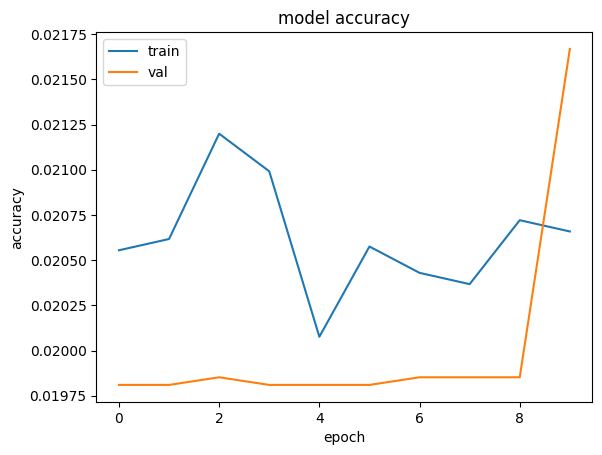

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# <font color='red'>Further Analysis

This section and everything below is a work in-progress. The title is to be determined

In [ ]:
# #Evaluation Matrix
# # List of different values of affinity
# affinity = ['rbf', 'nearest-neighbours']

# # List of Silhouette Scores
# s_scores = []

# # Evaluating the performance
# s_scores.append(silhouette_score(raw_df, labels_rbf))
# s_scores.append(silhouette_score(raw_df, labels_nn))

# # Plotting a Bar Graph to compare the models
# plt.bar(affinity, s_scores)
# plt.xlabel('Affinity')
# plt.ylabel('Silhouette Score')
# plt.title('Comparison of different Clustering Models')
# plt.show()

# print(s_scores)

##### Reference
https://www.kaggle.com/code/vipulgandhi/spectral-clustering-detailed-explanation